## **BUSINESS UNDERSTANDING**

Understanding of the **processes involved**, resources, constraints, requirements... and definition of **objectives and KPIs (Key Performance Indicators)**.

Context:

[https://archive.ics.uci.edu/dataset/33/dermatology]
(https://archive.ics.uci.edu/dataset/33/dermatology)


*Processes involved: Data retrieval. Loading of dermatology data set from the UCI
*Objectives:
1. **Classification Accuracy**:Build a model that accurately classifies skin conditions. This is the primary objective for a classification problem. It does not consist of a unsupervised problem, due to the knowledge of the labels, nor a reinforcement problem, due to lack of an agent, actions to perform, and an environment. 
2. **Multiclass Classification**: Successfully classify skin conditions into their respective classes: 1,2,3,4,5 or 6
3. **Generalization**: Ensure that the model can generalise well to unseen data, which is crucial for real-world applicability.
4. **Interpretable Models**: If interpretability is important, aim to build models that provide insights into which features are most influential in making predictions.
5. **Efficiency**: Develop models that can make predictions quickly, as efficiency might be essential in a clinical setting.
6. **Reducing Misdiagnoses**: Minimise the number of misclassifications, especially for severe skin conditions, to improve patient care.
7. **Handling Imbalanced Data**: Address imbalanced class distribution if present in the dataset to ensure that the model performs well for both common and rare conditions.
8. **Robustness**: Ensure that the model is robust to variations in input data, such as differences in image quality or lighting conditions if relevant.

*KPIs:
1. **Accuracy**: The overall proportion of correctly classified skin conditions. Track both training and testing accuracy.
2. **Precision**: The ratio of true positive predictions to the total positive predictions for each class. Calculate precision for each skin condition class.
3. **Recall**: The ratio of true positive predictions to the total actual positives for each class. Calculate recall for each skin condition class.
4. **F1 Score**: The harmonic mean of precision and recall for each class. It provides a balance between precision and recall.
5. **Confusion Matrix**: Visualise the confusion matrix to understand the number of true positives, false positives, true negatives, and false negatives for each class.
6. **Class Distribution**: Track the distribution of predicted classes to ensure that the model doesn't always predict the majority class, which can be important in imbalanced datasets.
7. **Model Training Time**: Measure the time it takes to train the model, which can be essential if real-time or near-real-time predictions are needed.
8. **Model Size**: Track the size of the trained model, which may be relevant for deployment on resource-constrained devices.
9. **Feature Importance**: If using interpretable models, assess the importance of each feature in making predictions.
10. **Cross-Validation**: Apply cross-validation to evaluate model performance robustly and prevent overfitting.
11. **Adequate Documentation**: Maintain comprehensive documentation of the model's architecture, hyperparameters, and preprocessing steps.

## **DATA UNDERSTANDING**

First of all, we import the "pandas" library that allows the handling and analysis of data structures, the "numpy" library which will help us make complex operations between data and the pyplot module from the "matplotlib" library to represent the data graphically.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The download of data is done from a url, where the csv format dataset is stored, we indicate columns with the features (characteristics of the dataset). Below is a description of the contents

In [3]:
url = "https://pkgstore.datahub.io/machine-learning/dermatology/dermatology_csv/data/8a7c88e486ea2cb227adc99d0de841d1/dermatology_csv.csv"
dermatology = pd.read_csv(url, skiprows=0, delimiter=',')
dermatology.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

**Exploring and analysis of the data**

In [4]:
dermatology.head()
dermatology.tail(3)
#dermatology.shape
#dermatology.index
#dermatology.columns
#dermatology['class']
#dermatology.dtypes
dermatology.describe() #Coinciden todos --> entonces no existe NaN

erythema     scaling  definite_borders     itching   
count  366.000000  366.000000        366.000000  366.000000  \
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules   
count          366.000000         366.000000          366.000000  \
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement   
count                366.000000                  366.000000  \
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  ...  disappearance_of_the_granular_layer   
count         366.000000  ...                           366.000000  \
mean            0.519126  ...                             0.464481   
std             0.905639  ...                             0.864899   
min             0.000000  ...                             0.000000   
25%             0.000000  ...                             0.000000   
50%             0.000000  ...                             0.000000   
75%             1.000000  ...                             1.000000   
max             3.000000  ...                             3.000000   

       vacuolisation_and_damage_of_basal_layer  spongiosis   
count                               366.000000  366.000000  \
mean                                  0.456284    0.953552   
std                                   0.954873    1.130172   
min                                   0.000000    0.000000   
25%                                   0.000000    0.000000   
50%                                   0.000000    0.000000   
75%                                   0.000000    2.000000   
max                                   3.000000    3.000000   

       saw-tooth_appearance_of_retes  follicular_horn_plug   
count                     366.000000            366.000000  \
mean                        0.453552              0.103825   
std                         0.954744              0.450433   
min                         0.000000              0.000000   
25%                         0.000000              0.000000   
50%                         0.000000              0.000000   
75%                         0.000000              0.000000   
max                         3.000000              3.000000   

       perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate   
count                    366.000000                           366.000000  \
mean                       0.114754                             1.866120   
std                        0.488723                             0.726108   
min                        0.000000                             0.000000   
25%                        0.000000                             1.000000   
50%                        0.000000                    

- Manage the missing the values

In [5]:
pd.set_option('display.max_rows', None)

dermatology.isnull().sum() #Contar los valores NaN

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

Because removing the 8 rows with NaN ages represents 2% of the dataset values we will not remove the rows and opt to swap the NaN values for the mean age.

In [6]:
average_age = dermatology['age'].mean()
dermatology['age']= dermatology['age'].fillna(average_age)
dermatology.describe()

erythema     scaling  definite_borders     itching   
count  366.000000  366.000000        366.000000  366.000000  \
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules   
count          366.000000         366.000000          366.000000  \
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement   
count                366.000000                  366.000000  \
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  ...  disappearance_of_the_granular_layer   
count         366.000000  ...                           366.000000  \
mean            0.519126  ...                             0.464481   
std             0.905639  ...                             0.864899   
min             0.000000  ...                             0.000000   
25%             0.000000  ...                             0.000000   
50%             0.000000  ...                             0.000000   
75%             1.000000  ...                             1.000000   
max             3.000000  ...                             3.000000   

       vacuolisation_and_damage_of_basal_layer  spongiosis   
count                               366.000000  366.000000  \
mean                                  0.456284    0.953552   
std                                   0.954873    1.130172   
min                                   0.000000    0.000000   
25%                                   0.000000    0.000000   
50%                                   0.000000    0.000000   
75%                                   0.000000    2.000000   
max                                   3.000000    3.000000   

       saw-tooth_appearance_of_retes  follicular_horn_plug   
count                     366.000000            366.000000  \
mean                        0.453552              0.103825   
std                         0.954744              0.450433   
min                         0.000000              0.000000   
25%                         0.000000              0.000000   
50%                         0.000000              0.000000   
75%                         0.000000              0.000000   
max                         3.000000              3.000000   

       perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate   
count                    366.000000                           366.000000  \
mean                       0.114754                             1.866120   
std                        0.488723                             0.726108   
min                        0.000000                             0.000000   
25%                        0.000000                             1.000000   
50%                        0.000000                    

Now we can observe that the 'age' column has 366 total values.

Nevertheless we still believe there could be more NaN values, due to the limited output offered by the notebook. For this purpose, we will define and execute a function which will verify if there are any NaN values left.

In [7]:
# Code generated by Bing AI
def find_nan_values(df):
    for col in df.columns:
        if df[col].isnull().any():
            row_index = df[col].idxmax()
            return f"NaN value found in row {row_index} and column {col}"
    return "No NaN values found in the dataframe"

find_nan_values(dermatology)

'No NaN values found in the dataframe'

As we can see, there are no more missing values in the datashet, so we can continue with the next steps of data preprocessing.

- Description of the Dataset

In [8]:
dermatology.groupby('class').agg(["count","min","max","std","mean"])

erythema                             scaling                     
         count min max       std      mean   count min max       std   
class                                                                  
1          112   0   3  0.621370  2.285714     112   1   3  0.627296  \
2           61   1   3  0.609129  2.278689      61   1   3  0.543717   
3           72   0   3  0.599295  2.083333      72   0   3  0.659439   
4           49   1   3  0.586121  1.897959      49   1   2  0.505076   
5           52   0   3  0.671551  1.500000      52   0   3  0.627127   
6           20   1   3  0.510418  2.050000      20   1   2  0.444262   

                 ... band-like_infiltrate                               age   
           mean  ...                count min max       std      mean count   
class            ...                                                          
1      2.196429  ...                  112   0   2  0.210526  0.026786   112  \
2      2.065574  ...                   61   0   2  0.256074  0.032787    61   
3      1.625000  ...                   72   2   3  0.451046  2.722222    72   
4      1.510204  ...                   49   0   0  0.000000  0.000000    49   
5      1.134615  ...                   52   0   1  0.138675  0.019231    52   
6      1.750000  ...                   20   0   1  0.223607  0.050000    20   

                                         
        min   max        std       mean  
class                                    
1       0.0  75.0  15.584563  39.350858  
2      10.0  70.0  13.465765  35.480264  
3      16.0  65.0  11.687296  39.906890  
4      12.0  70.0  13.819151  35.291757  
5       8.0  70.0  14.835816  36.638161  
6       7.0  22.0   3.711646  10.250000  

[6 rows x 170 columns]

#### Outlier detection
- Histogram

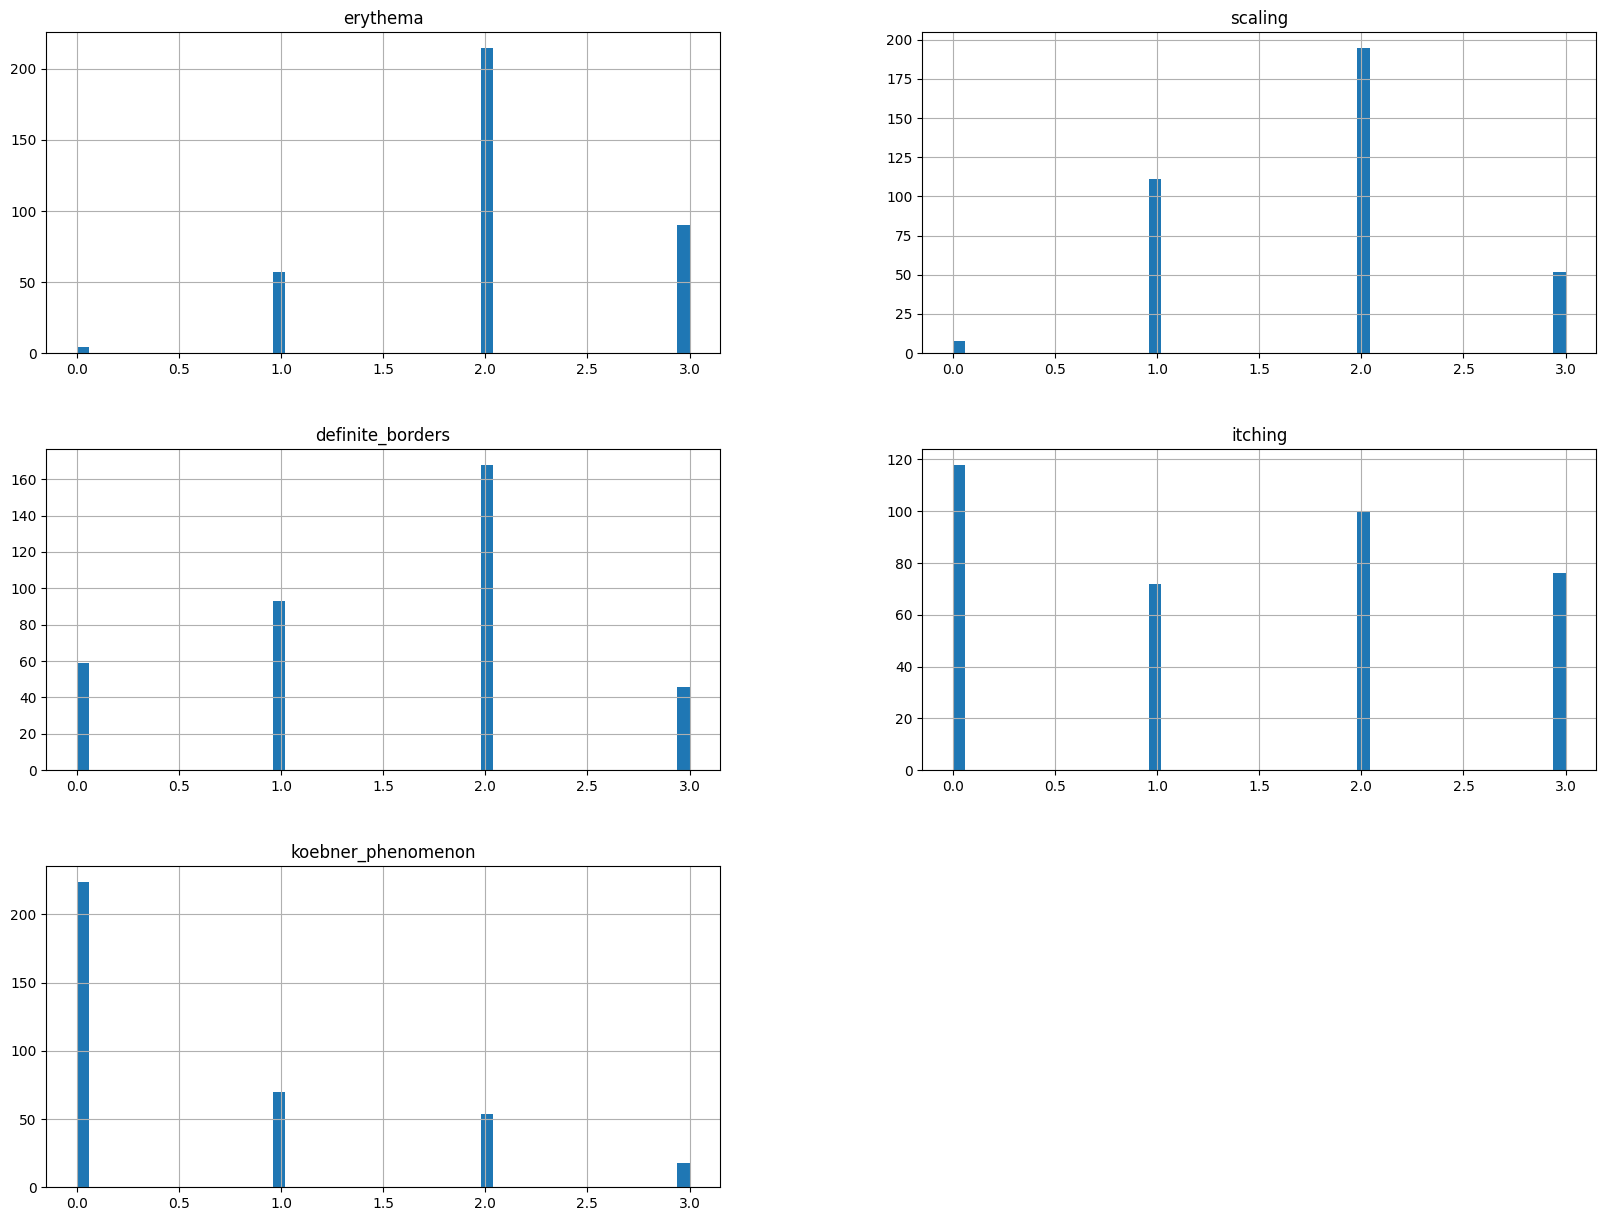

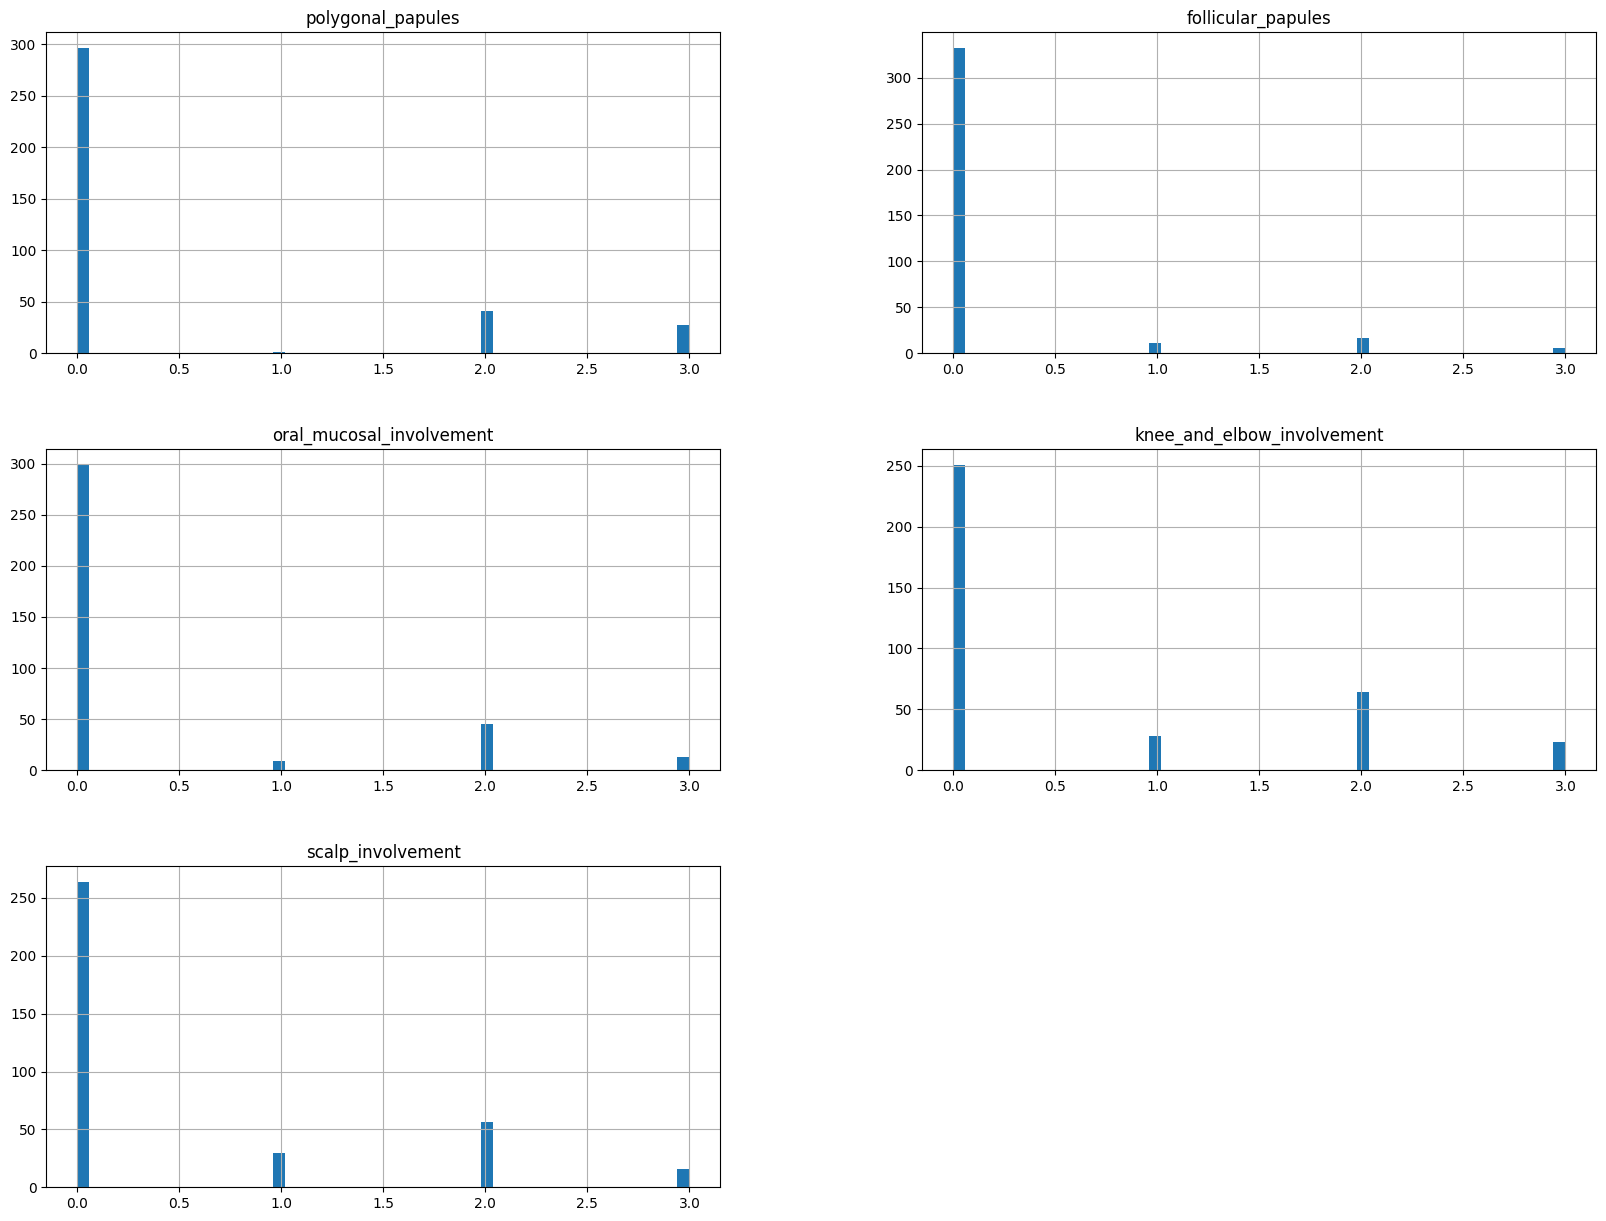

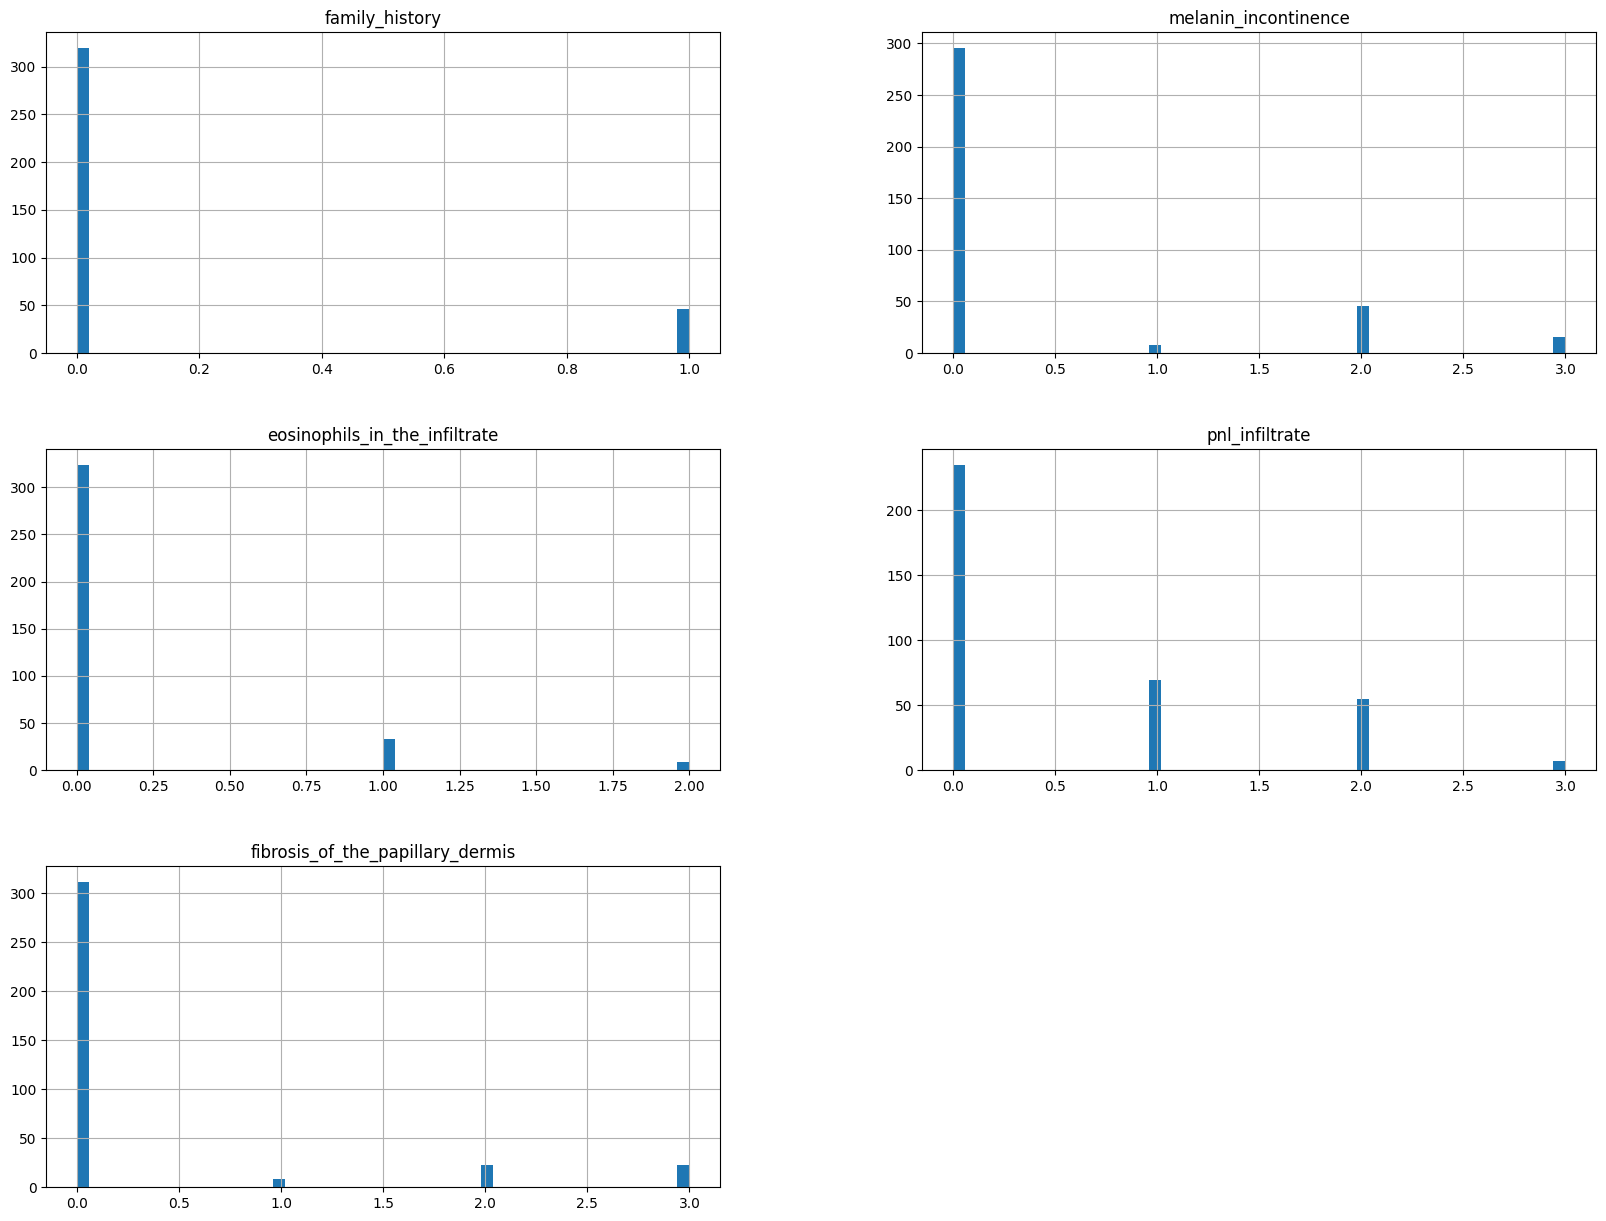

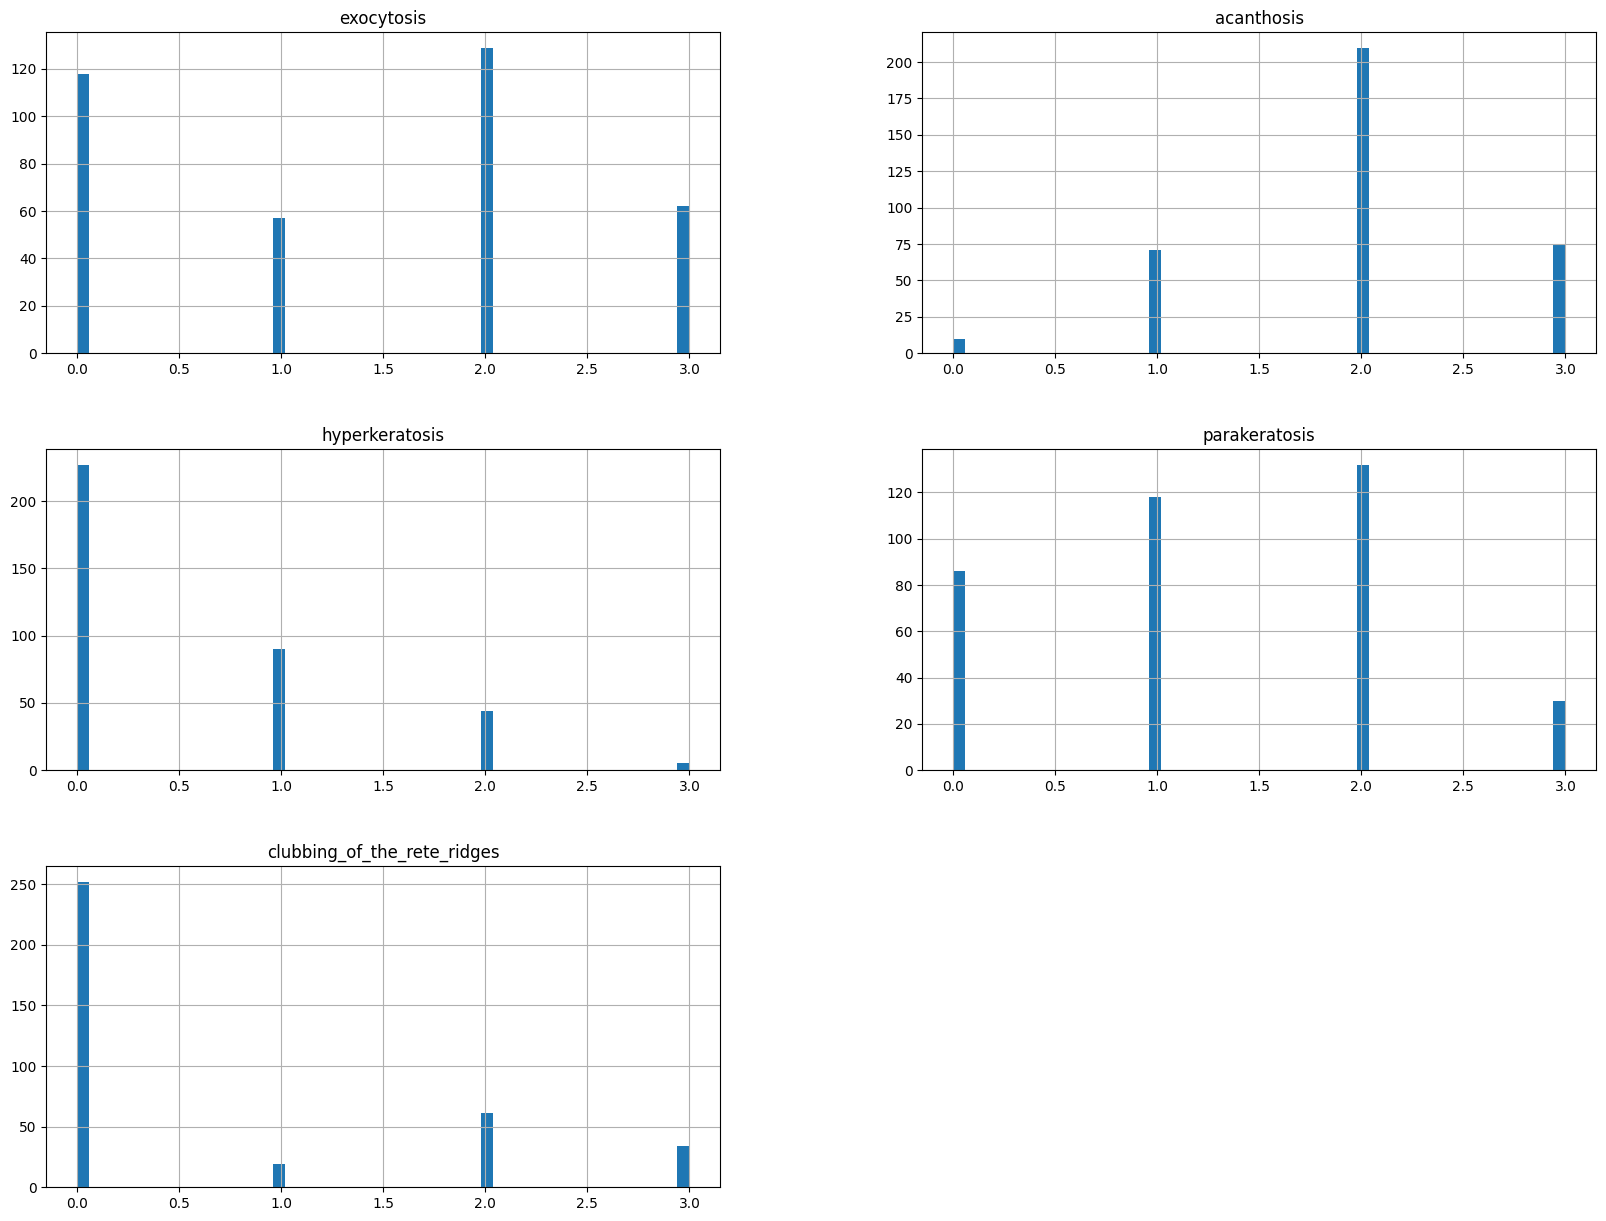

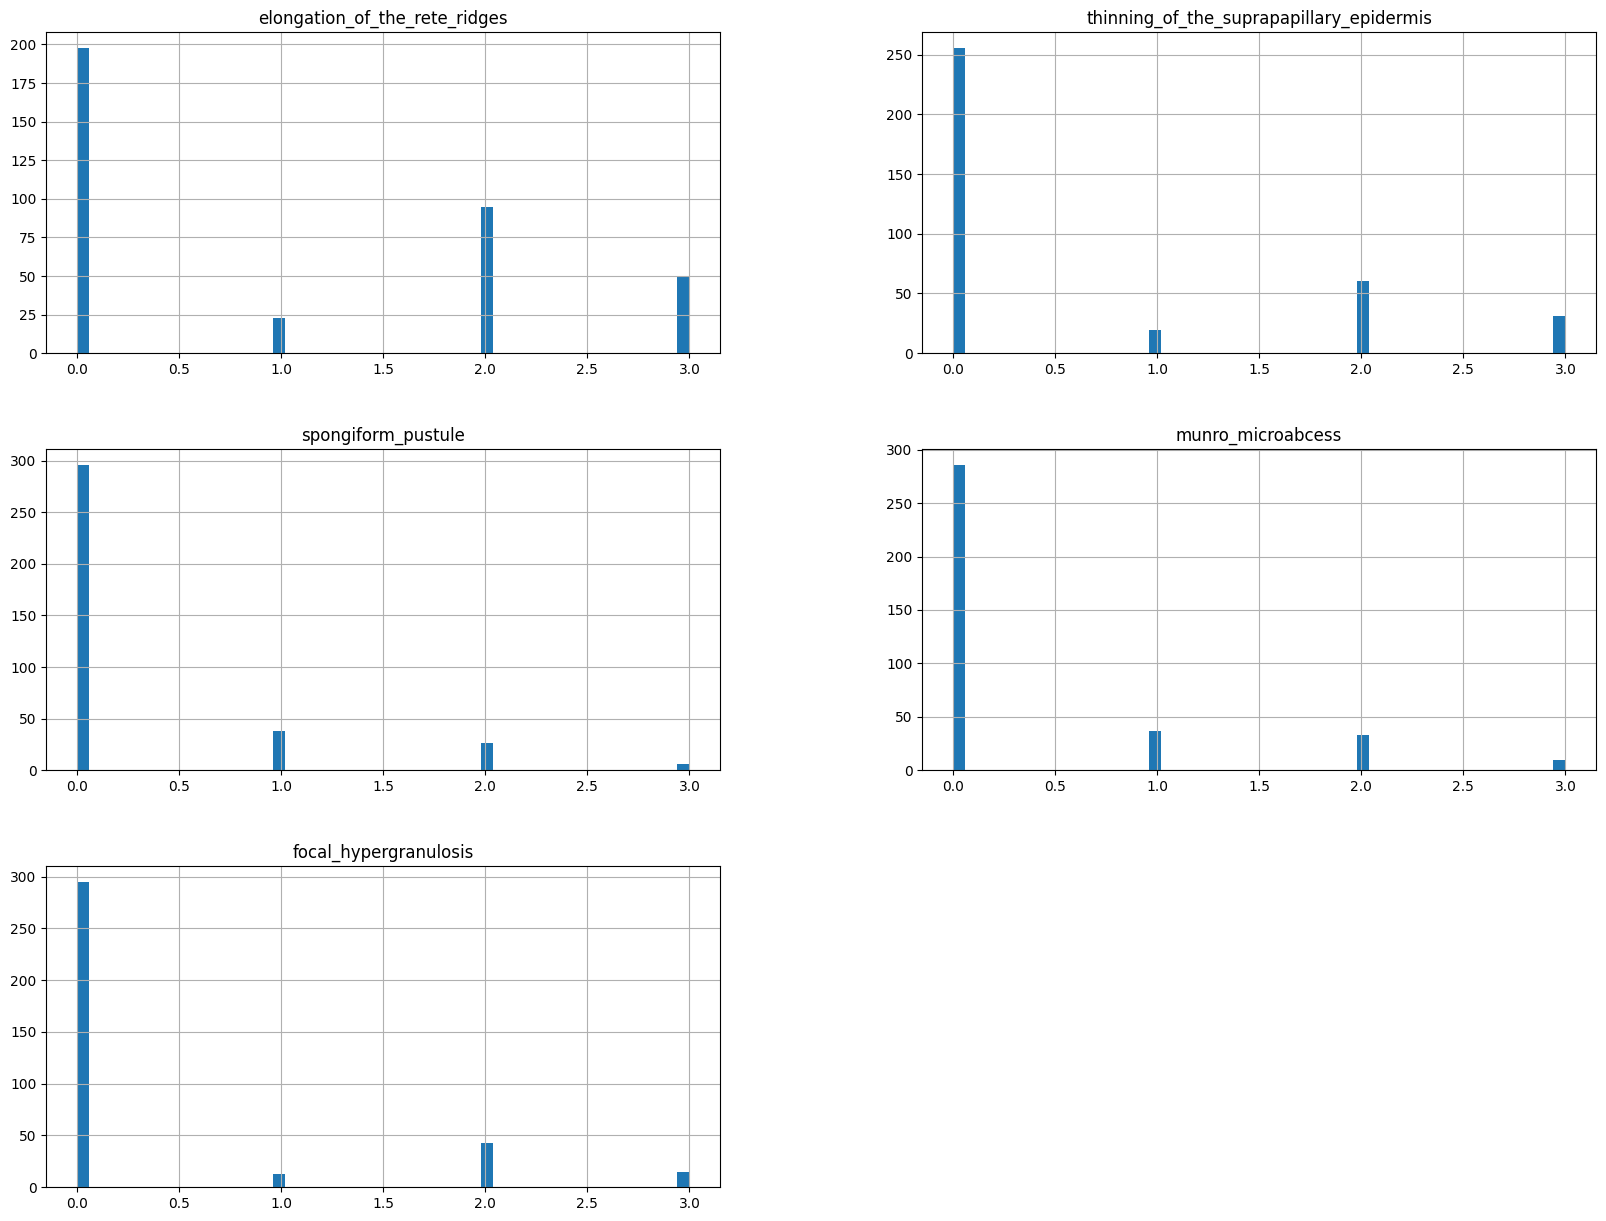

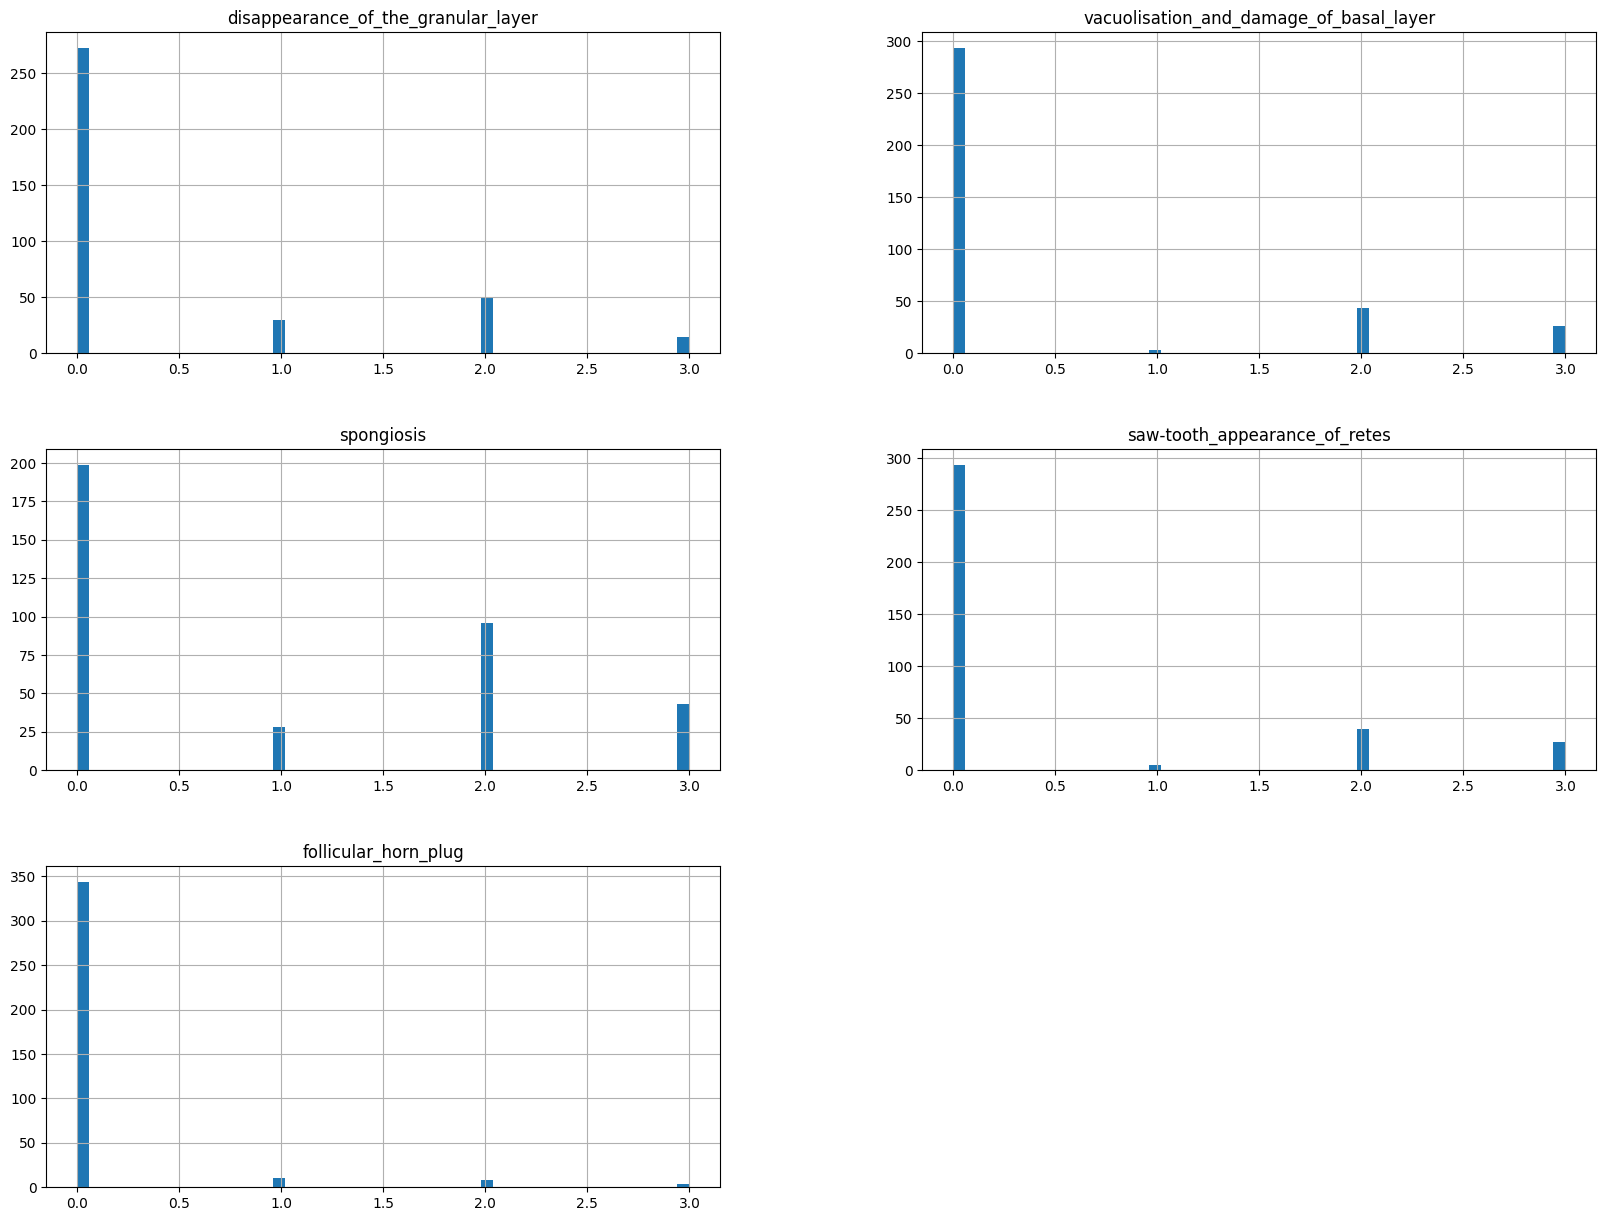

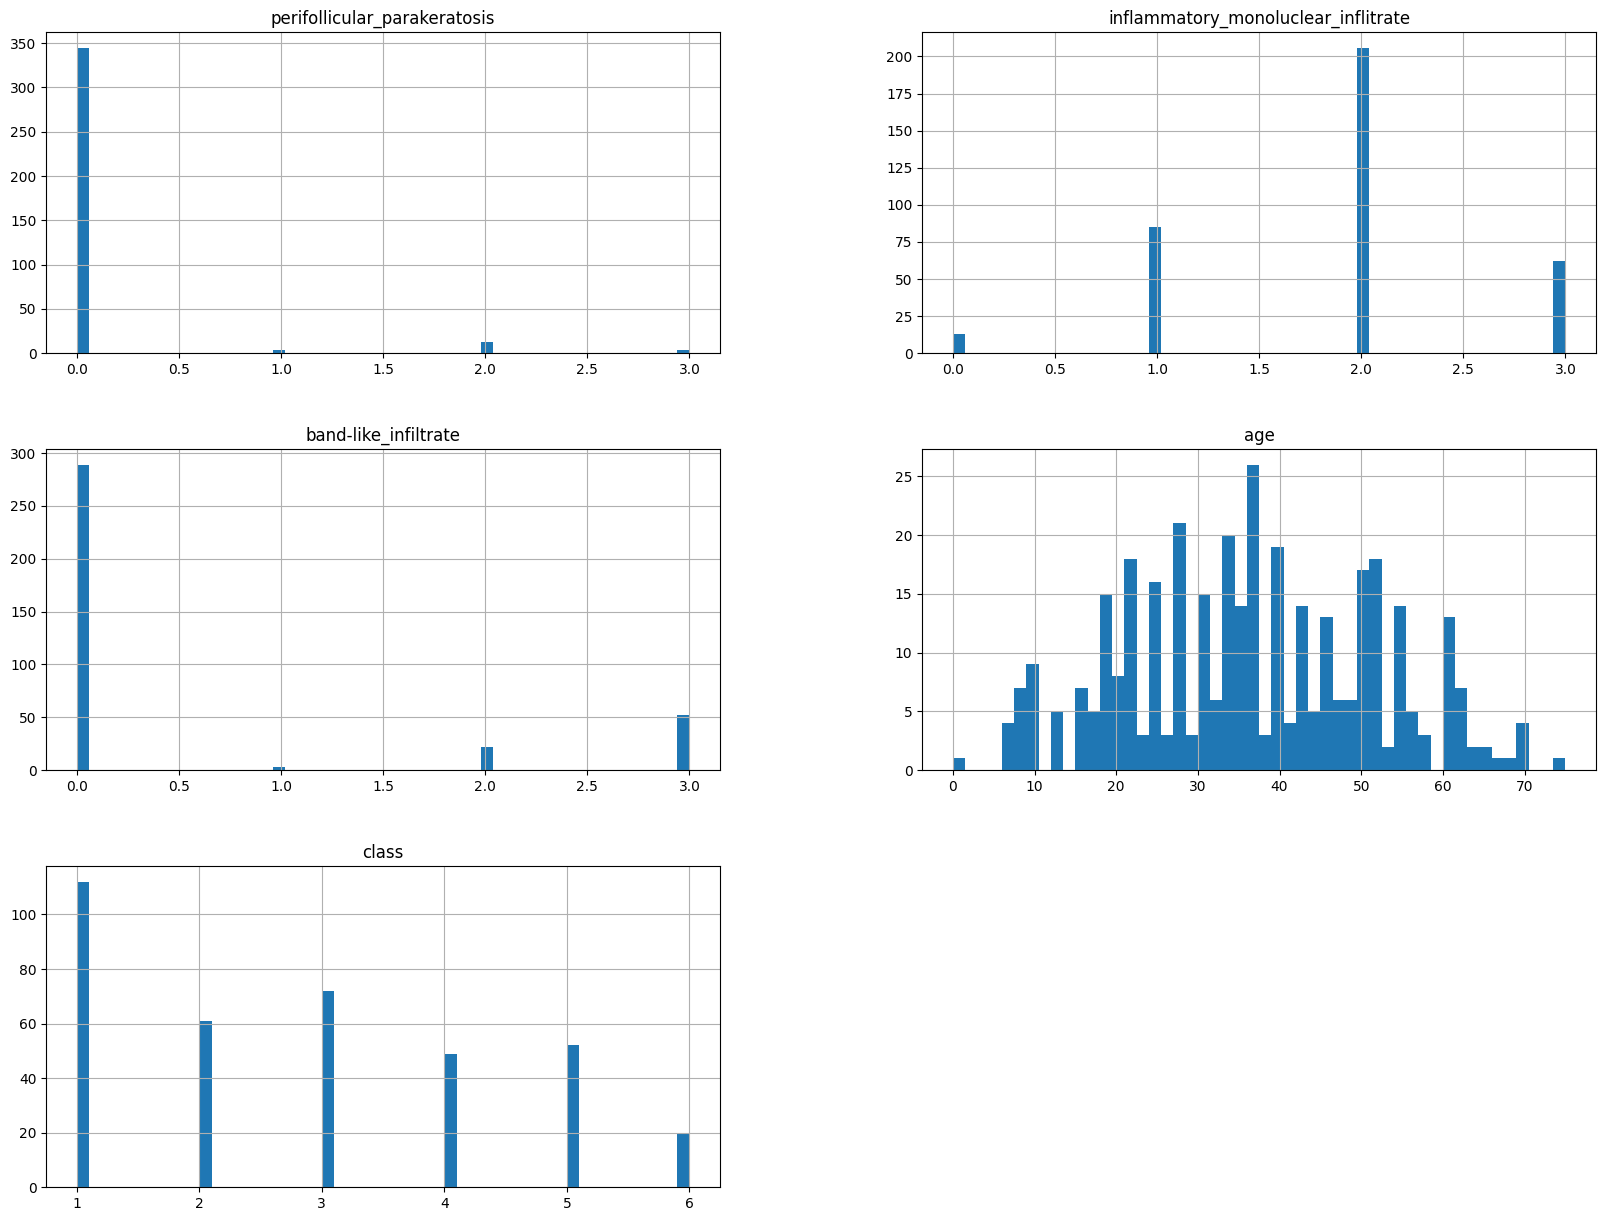

In [9]:
num_attributes = dermatology.shape[1]
num_plots = 5

for i in range(0, num_attributes, num_plots):
    dermatology.iloc[:, i:i+num_plots].hist(bins=50, figsize=(20,15))
    plt.show()

Using a histogram we cannot detect any outliers, only find rages for the features which is not the purpose of this section. For finding outliers, we will use another visualisation method: a boxplot. 
- Boxplot

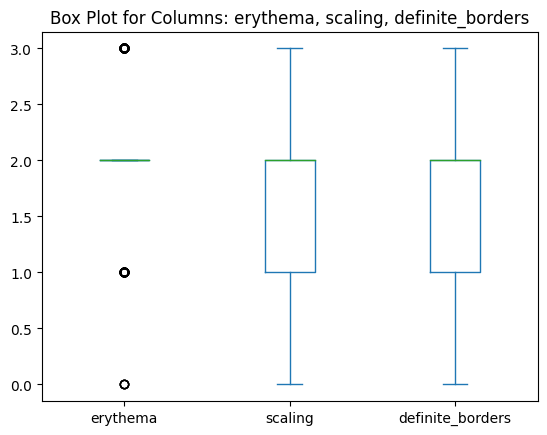

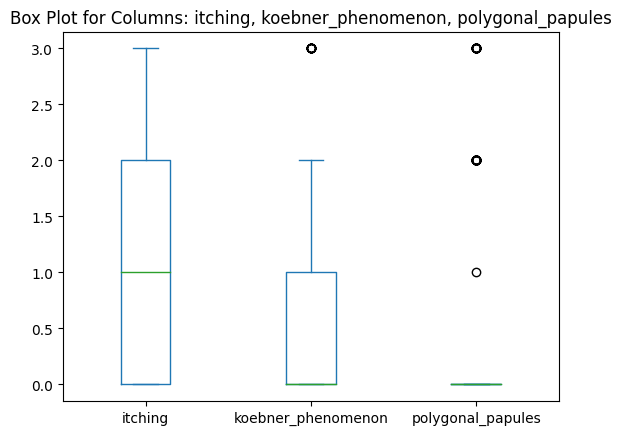

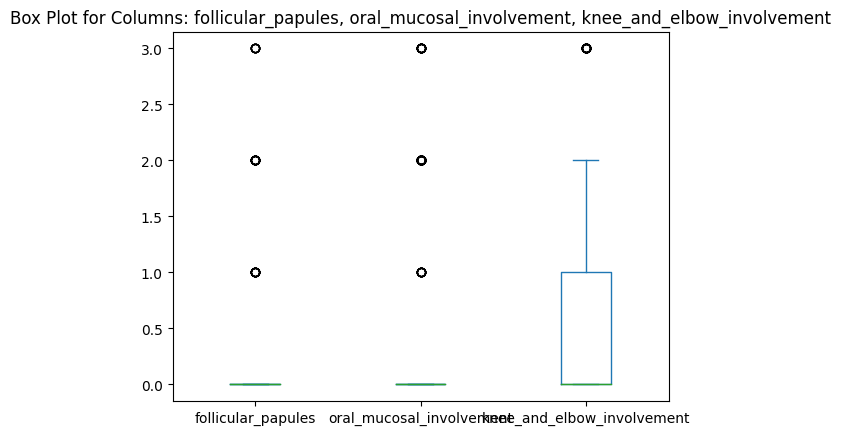

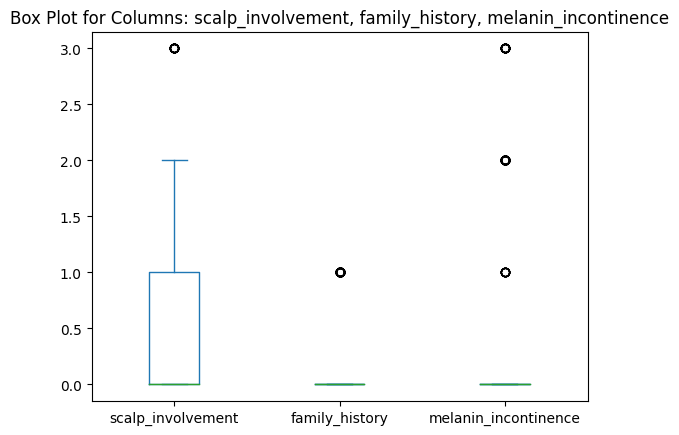

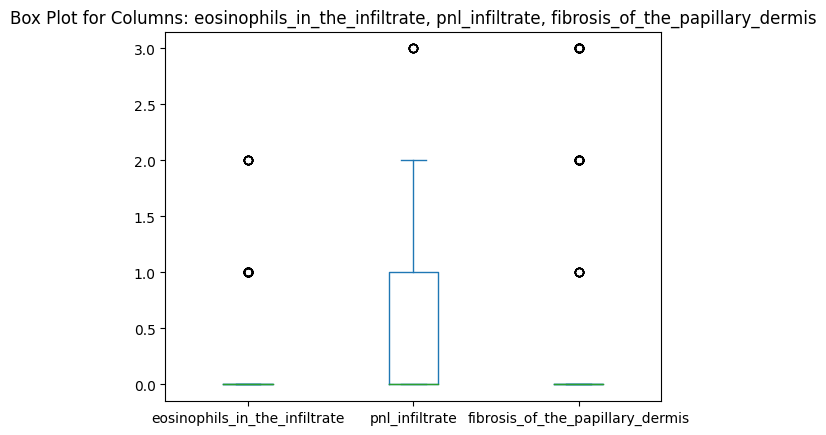

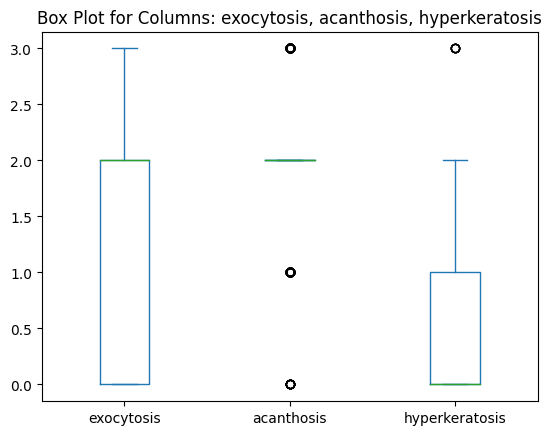

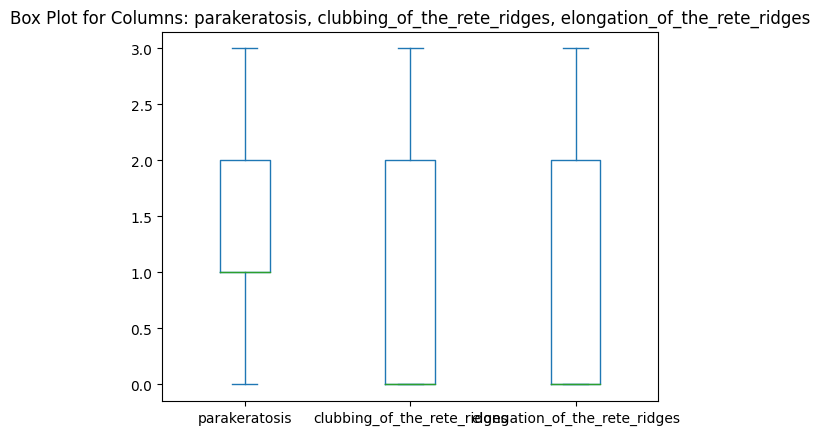

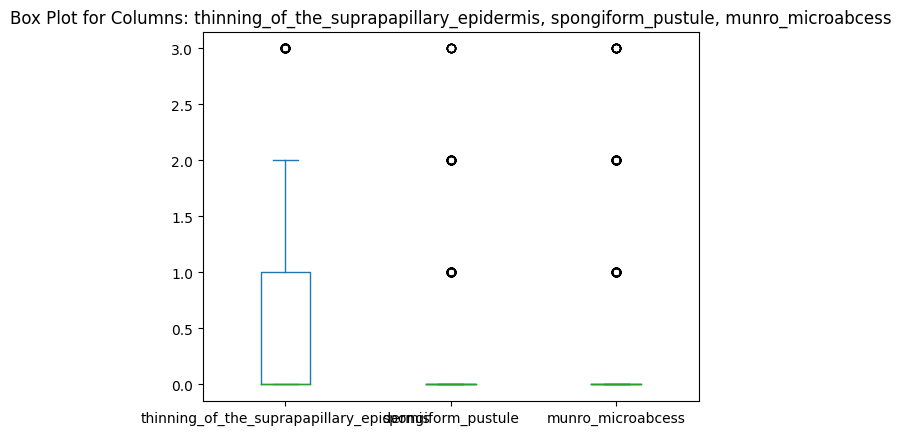

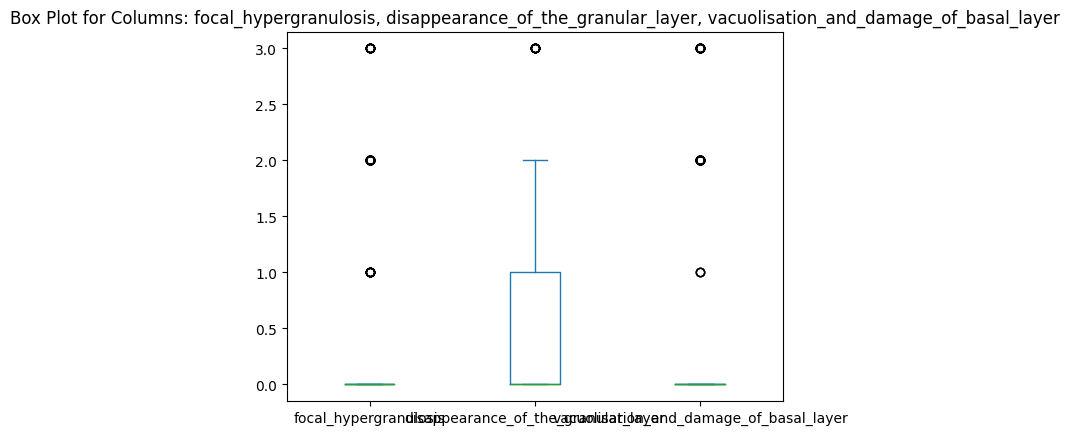

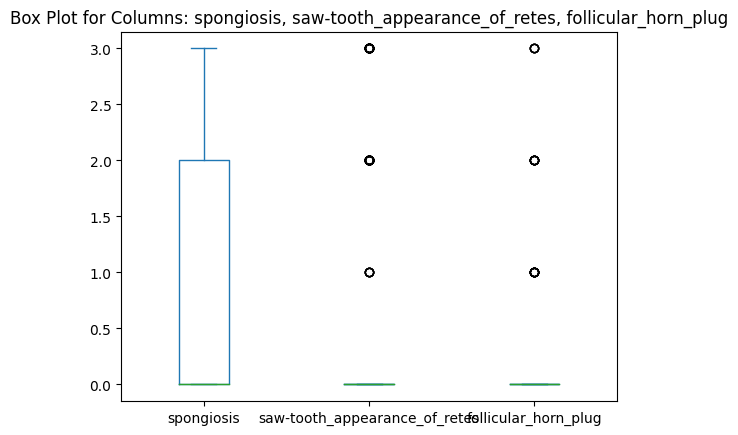

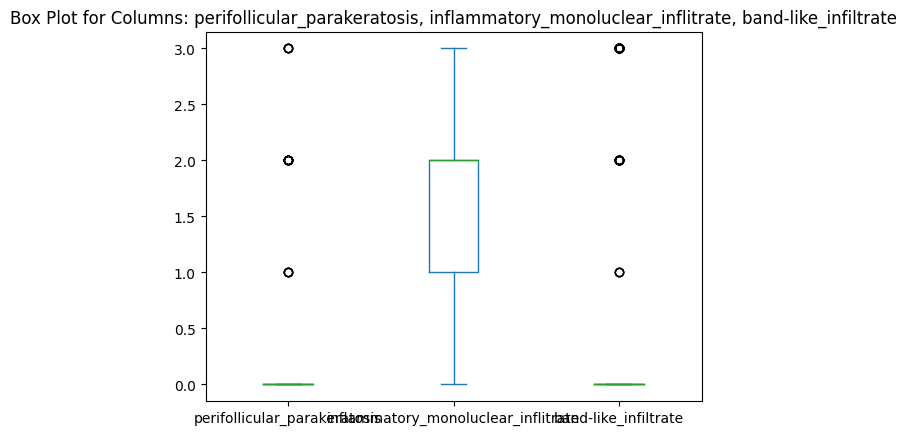

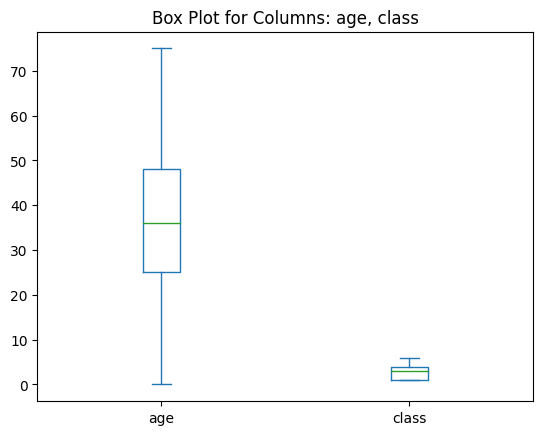

In [10]:
# Code generated by ChatGPT-3.5

# Get the list of column names
columns = dermatology.columns

# Divide the columns into groups of 3
grouped_columns = [columns[i:i+3] for i in range(0, len(columns), 3)]

# Create subplots for each group of 3 columns
for group in grouped_columns:
    subset = dermatology[group]  # Extract the subset of columns for the current group
    subset.plot(kind='box', vert=True)  # Create a horizontal box plot for the subset
    plt.title("Box Plot for Columns: " + ', '.join(group))
    plt.show()

We can observe that multiple features have outliers (marked with black dots with a white filling), meaning we will need to establish a criteria to manage them. Our criteria will be to substitute them by the mean value if those outliers suppose less than 2.5% of the dataset's values. This criteria has been set in accordance to our objectives and KPIs.


In [11]:
# Calculate and count outliers using the IQR method
features_with_changed_values=[]
for column in dermatology.columns:
    Q1 = dermatology[column].quantile(0.25)
    Q3 = dermatology[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filter = (dermatology[column] < lower_bound) | (dermatology[column] > upper_bound)
    # print (filter)
    print('Column name:', column)
    print('Total data:', dermatology.shape[0], '. Outliers:', filter.sum())
    #dermatology.loc[filter]
    percentage_of_outliers = filter.sum() / dermatology.shape[0]
    print('Percentage of outliers: ', percentage_of_outliers)
    mean_of_feature = dermatology[column].mean()
    # Change outliers for the mean if the percentage is lower than 2.5%
    if percentage_of_outliers < 0.025 and percentage_of_outliers != 0.0:
        print('Outliers percentage less than 10%. Changing values for mean...')
        # Add the feature to the changed values list
        features_with_changed_values.append(column)
        # Change outliers for the mean
        for index in dermatology.index[filter]:
            dermatology.at[index, column] = mean_of_feature
    print('\n')
    
#print('Total outliers: ', num_total_outliers)
#print('Percentage of outliers: ', (num_total_outliers/len(dermatology))*100)
#plt.figure(figsize=(40, 24)) # Tamaño personalizado de la figura
#dermatology.boxplot()
#plt.show()

Column name: erythema
Total data: 366 . Outliers: 151
Percentage of outliers:  0.412568306010929


Column name: scaling
Total data: 366 . Outliers: 0
Percentage of outliers:  0.0


Column name: definite_borders
Total data: 366 . Outliers: 0
Percentage of outliers:  0.0


Column name: itching
Total data: 366 . Outliers: 0
Percentage of outliers:  0.0


Column name: koebner_phenomenon
Total data: 366 . Outliers: 18
Percentage of outliers:  0.04918032786885246


Column name: polygonal_papules
Total data: 366 . Outliers: 69
Percentage of outliers:  0.1885245901639344


Column name: follicular_papules
Total data: 366 . Outliers: 33
Percentage of outliers:  0.09016393442622951


Column name: oral_mucosal_involvement
Total data: 366 . Outliers: 67
Percentage of outliers:  0.1830601092896175


Column name: knee_and_elbow_involvement
Total data: 366 . Outliers: 23
Percentage of outliers:  0.06284153005464481


Column name: scalp_involvement
Total data: 366 . Outliers: 16
Percentage of outliers:

In order to verify that we have removed the outliers correctly, we will boxplot once again the features in which we have changed the outliers for the mean and verify that the outliers have been changed successfully.

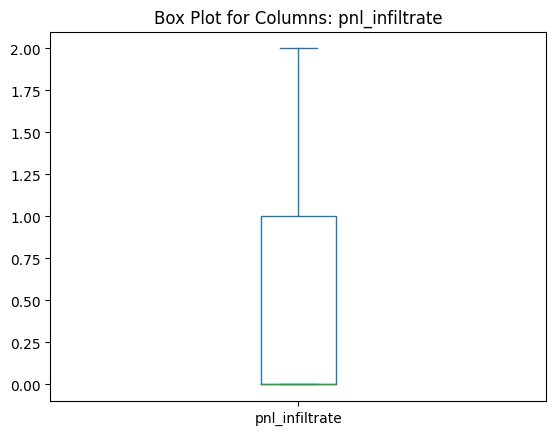

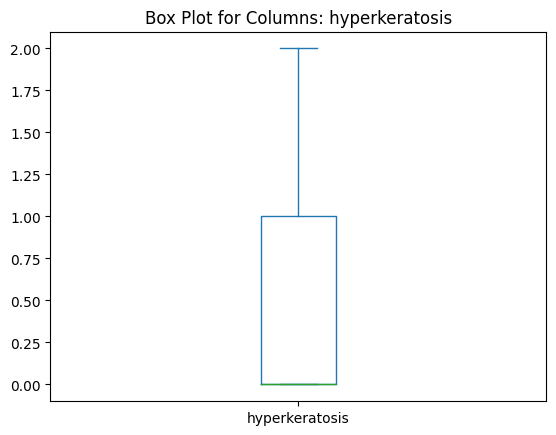

In [12]:
# Divide the features into groups of 3
grouped_columns = [features_with_changed_values[i:i+3] for i in range(0, len(features_with_changed_values), 3)]

# Create subplots for each group of 3 columns
for group in features_with_changed_values:
    subset = dermatology[group]  # Extract the subset of columns for the current group
    subset.plot(kind='box', vert=True)  # Create a horizontal box plot for the subset
    plt.title("Box Plot for Columns: " + group)
    plt.show()

As we can visualise from our verification, we could only find 2 features with "outliers". We will refer to them as outliers due to them ammounting to 2.5% of each feature. We initially established that those "outliers" ammounted to lest than 10%. Nevertheless, we determined that this percentage would vary greatly the outcome of our training and could generate misleading results (We would be varying 36 rows from a small dataset of 366 datapoints)

- Bar Graphs

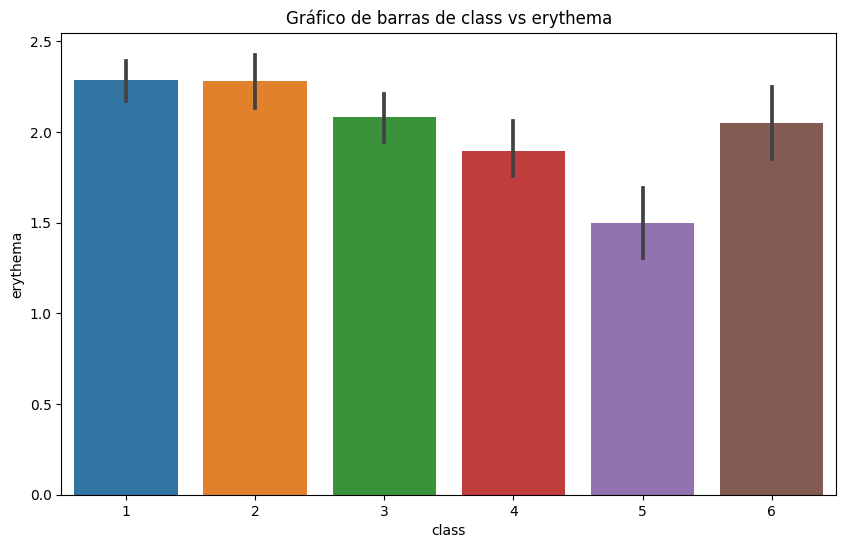

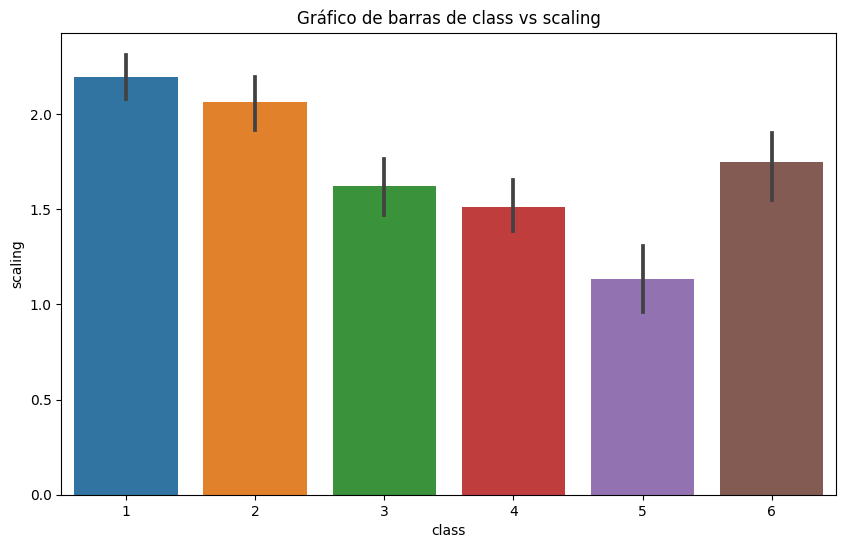

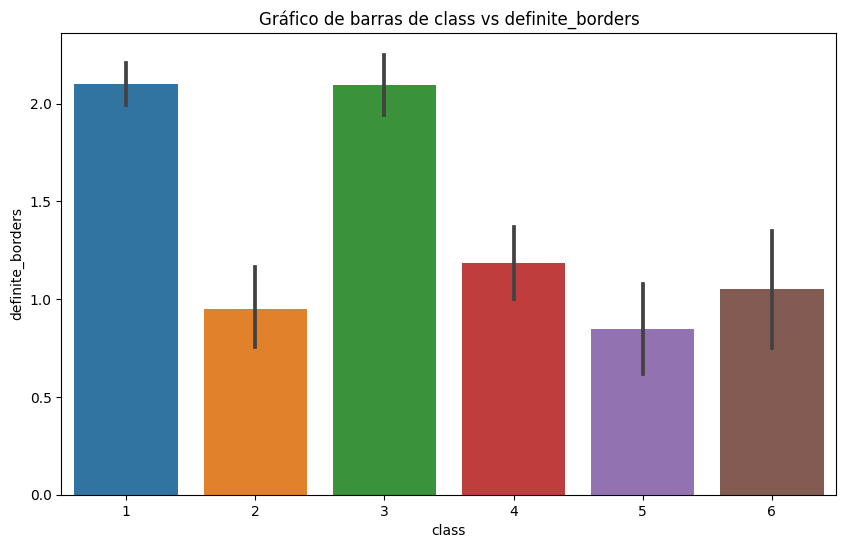

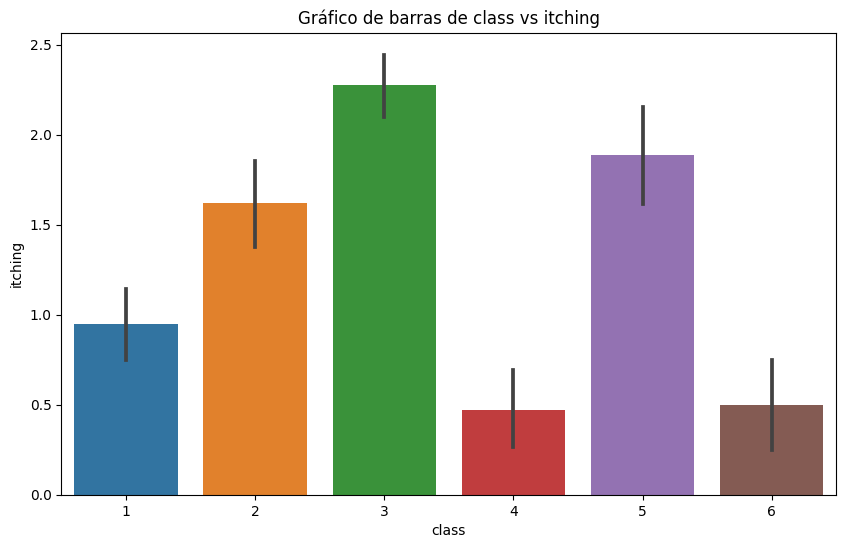

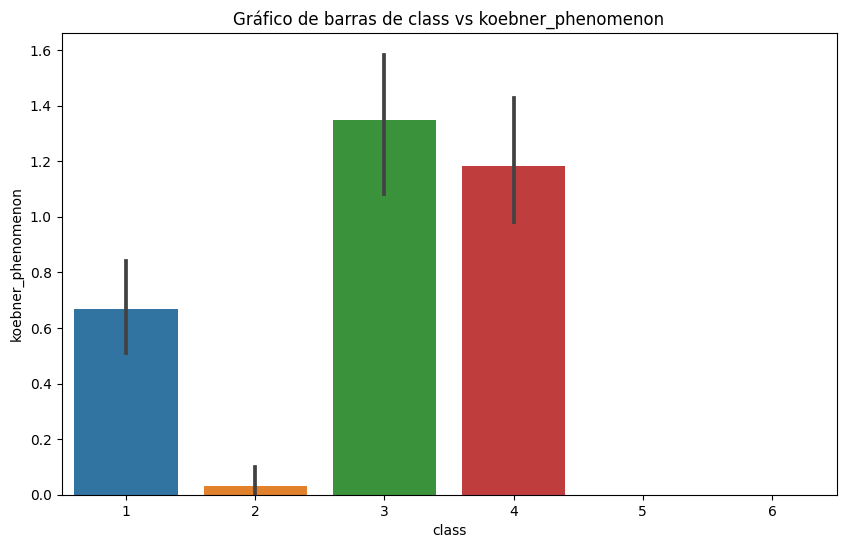

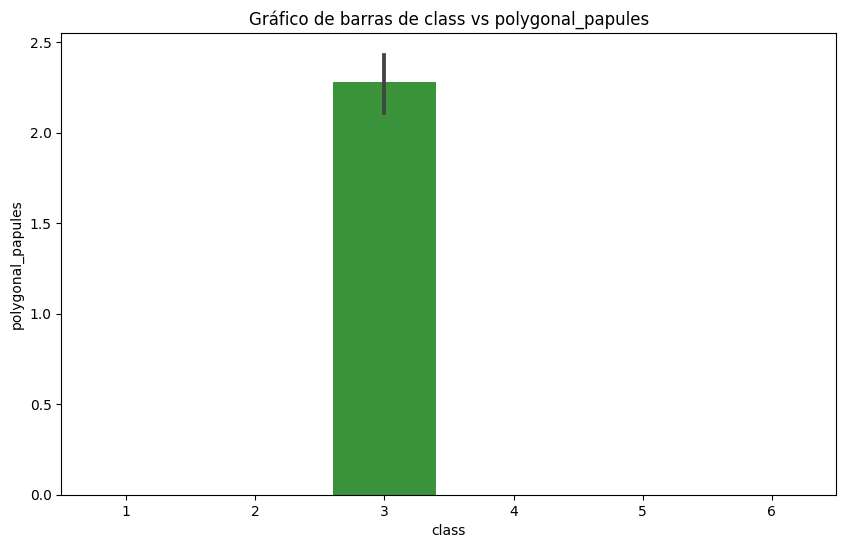

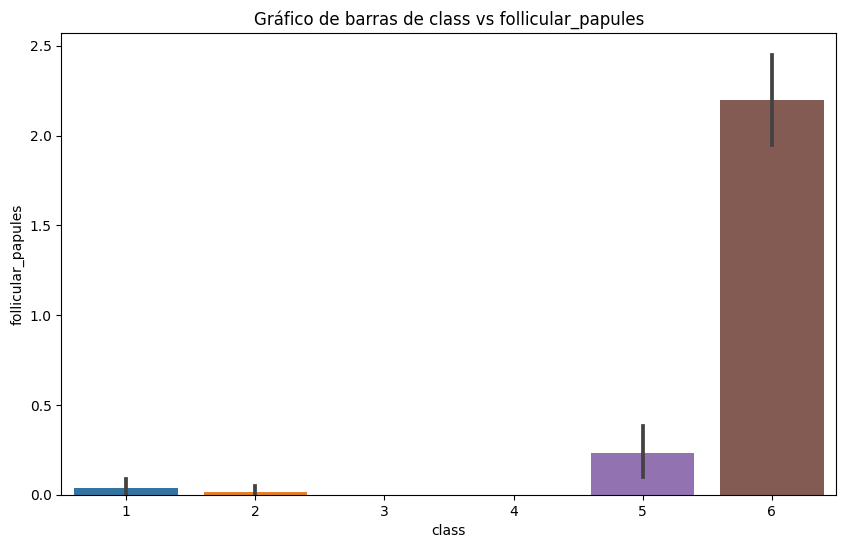

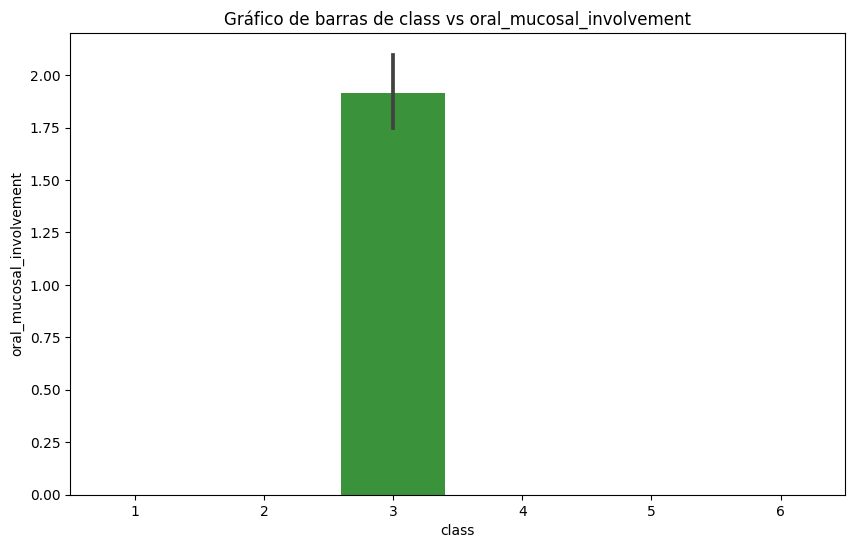

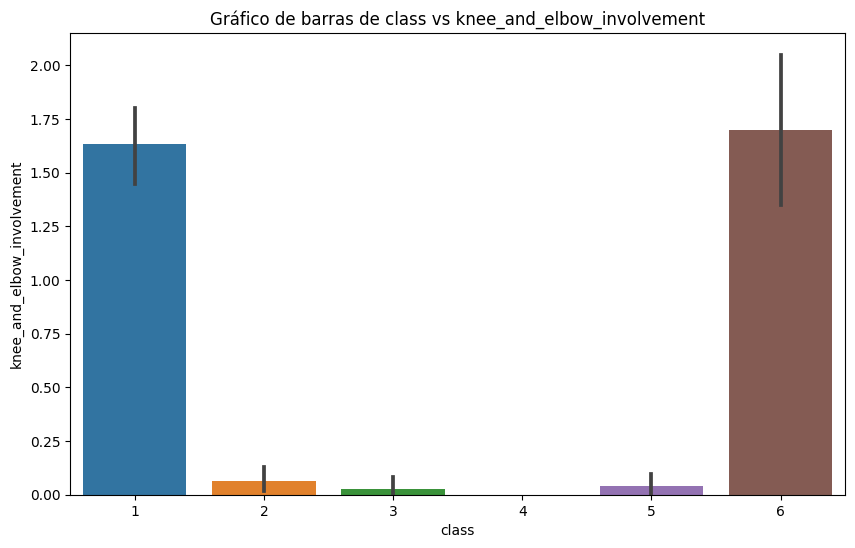

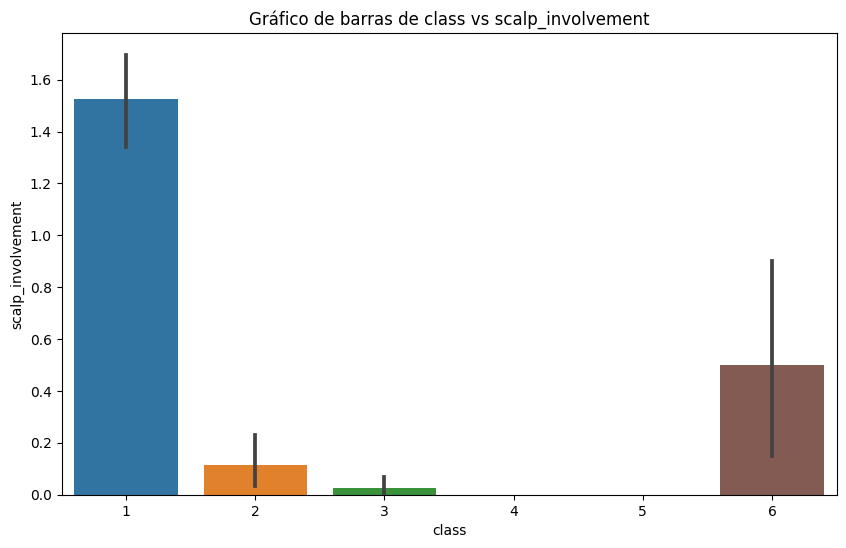

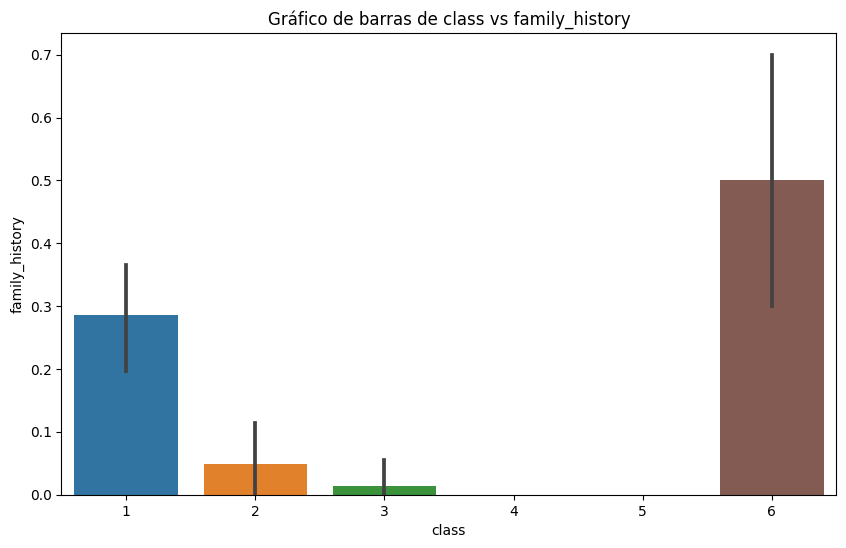

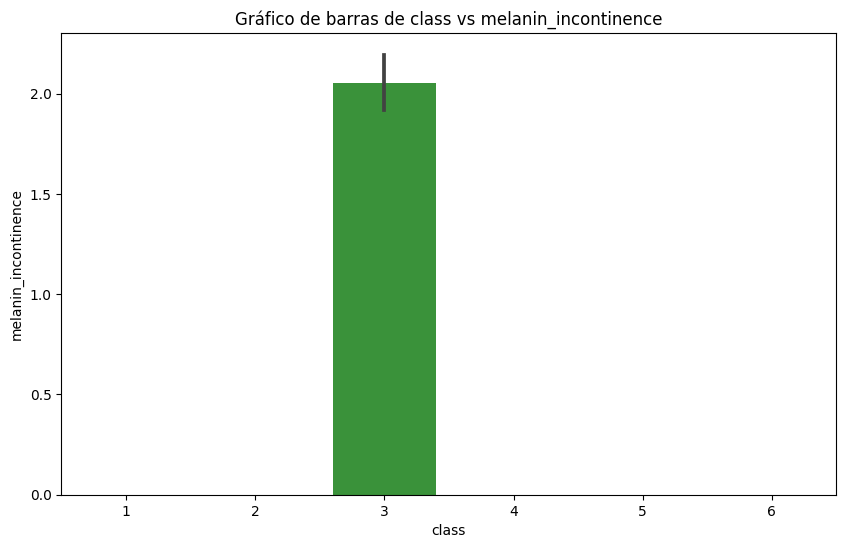

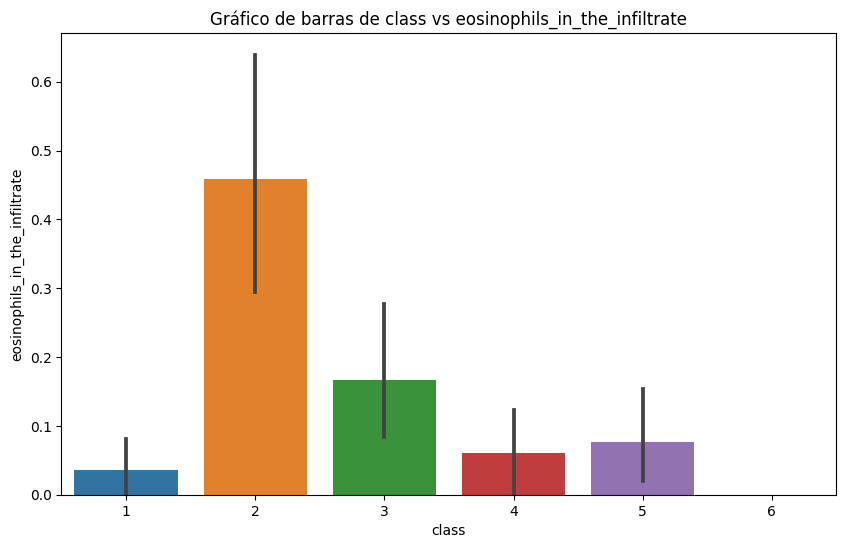

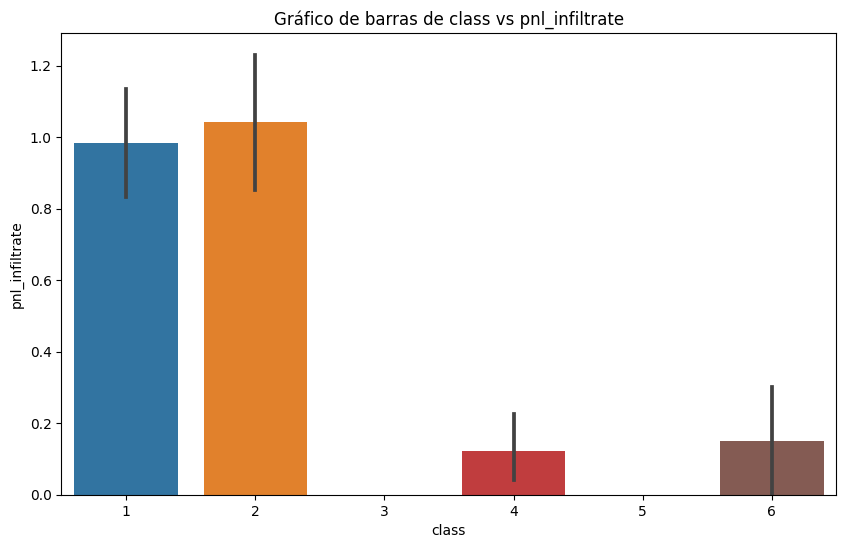

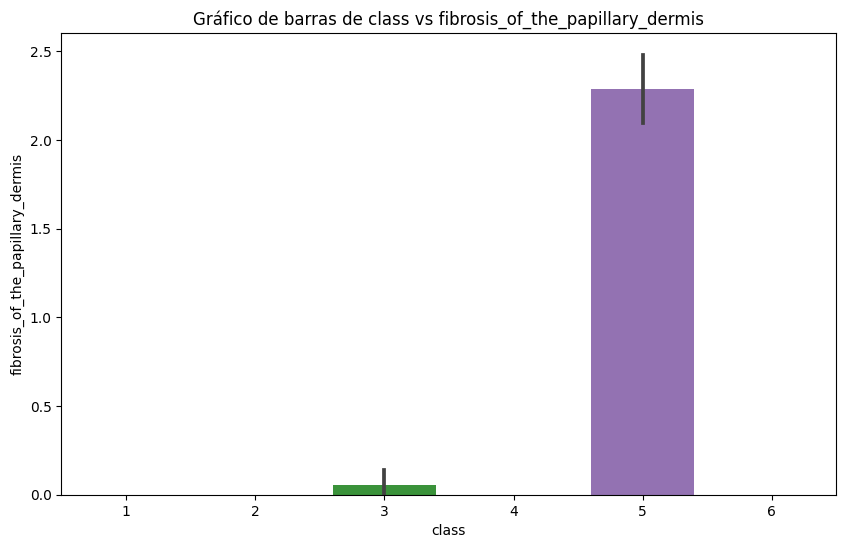

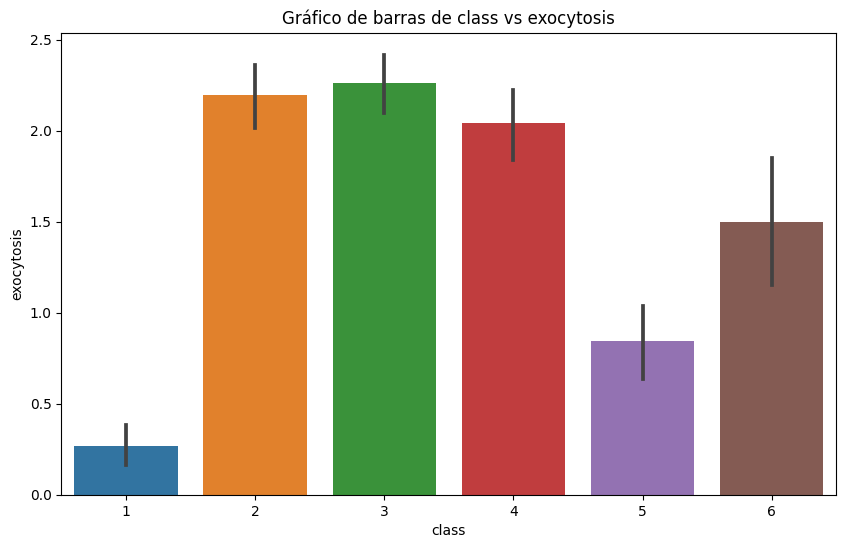

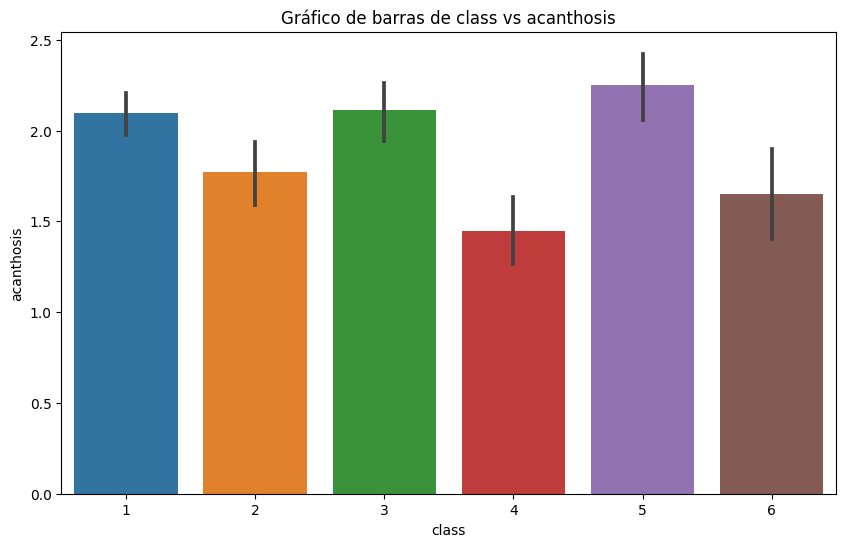

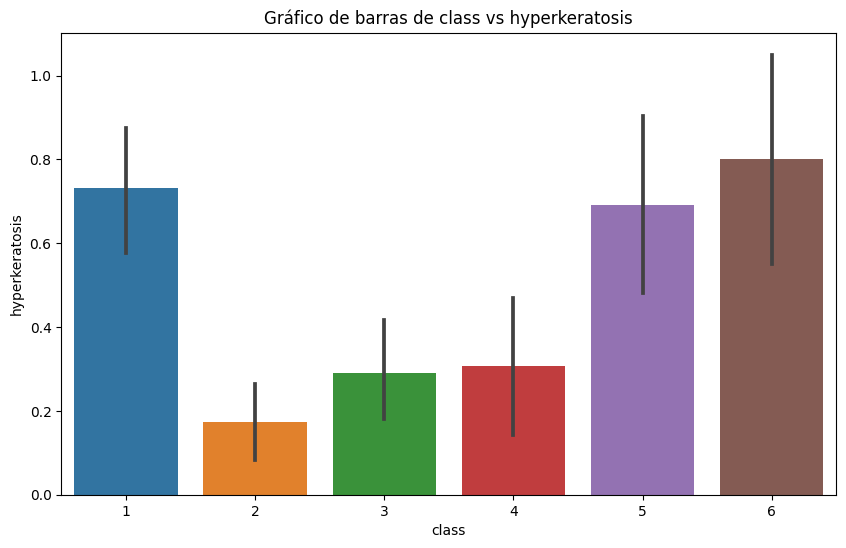

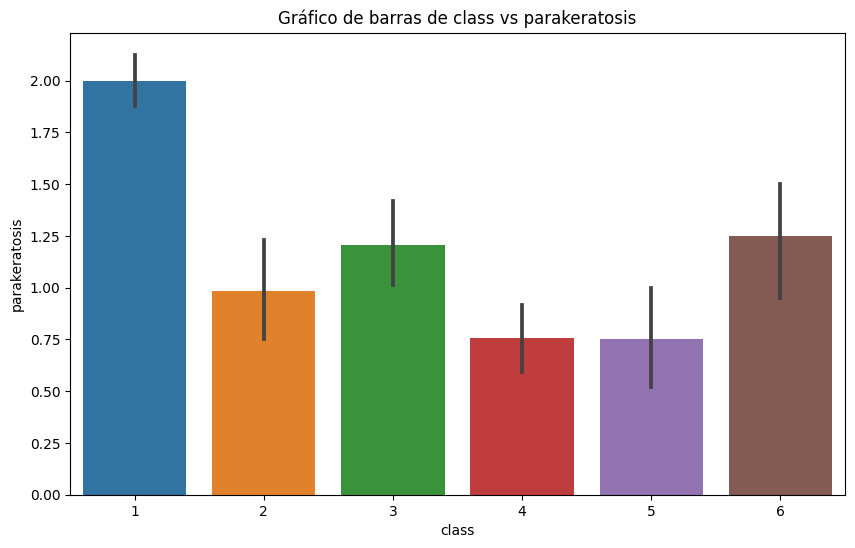

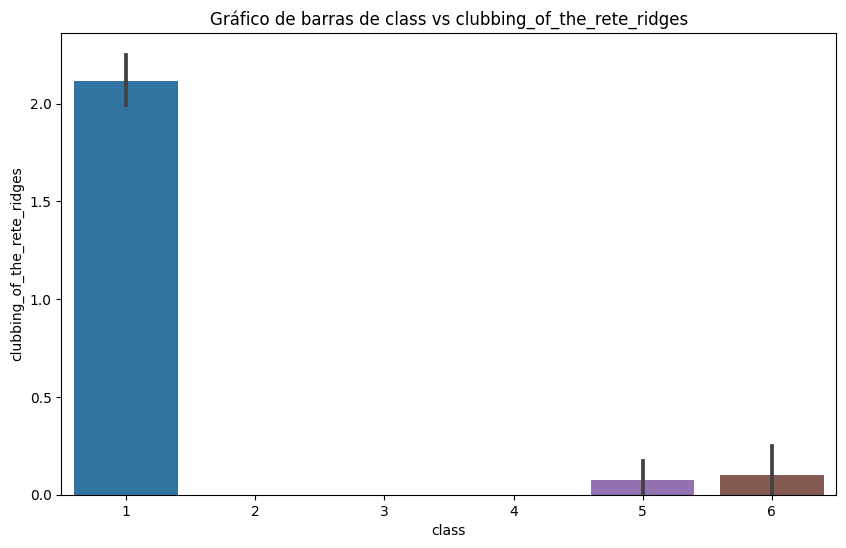

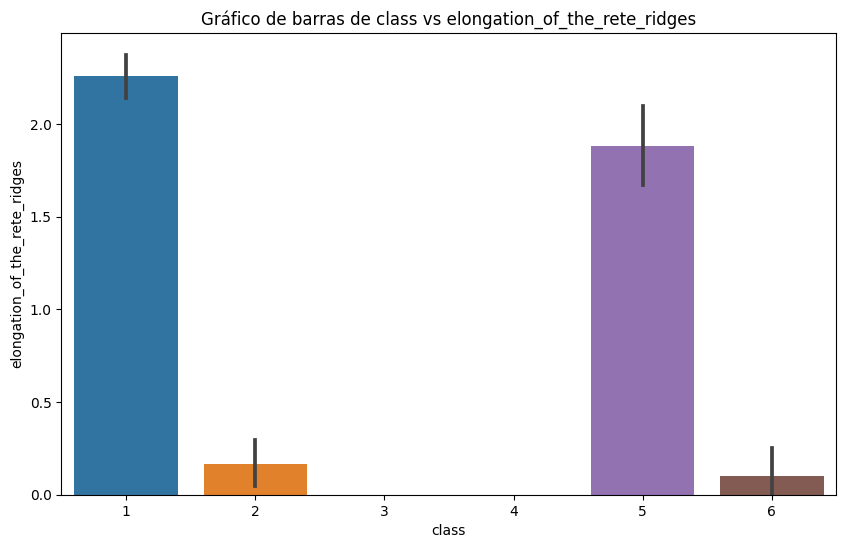

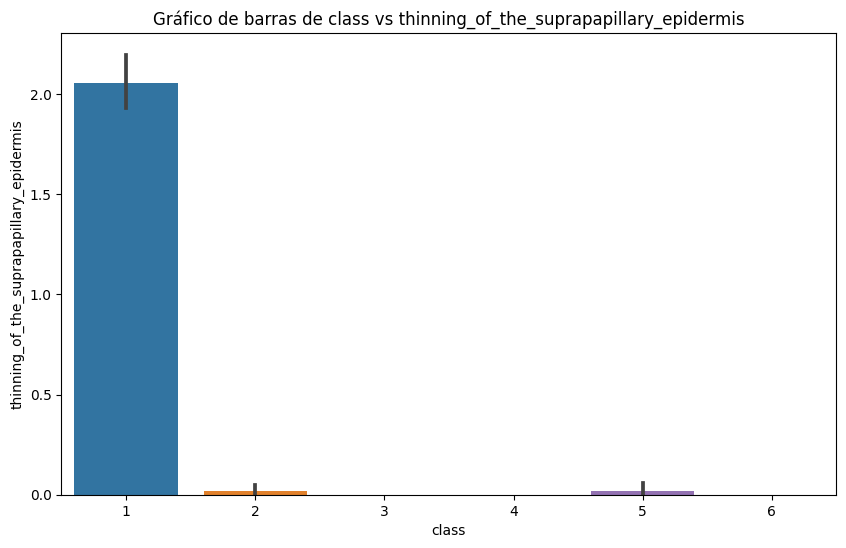

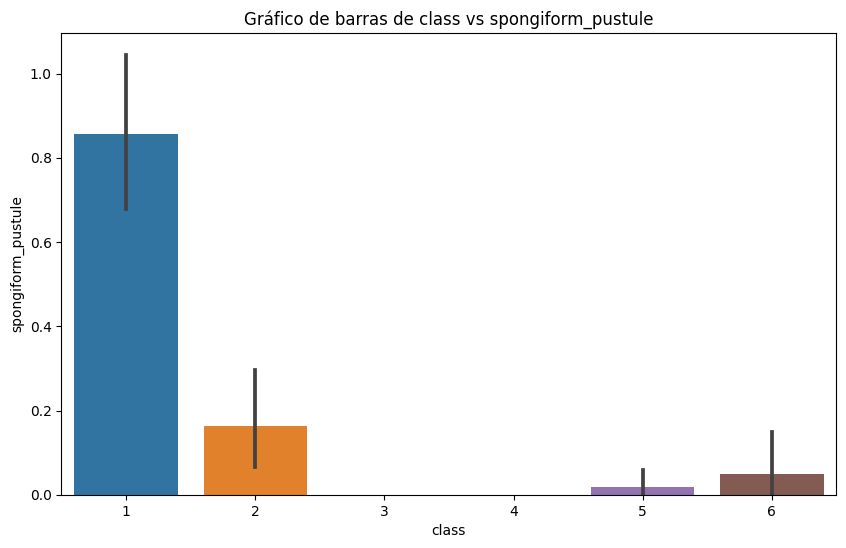

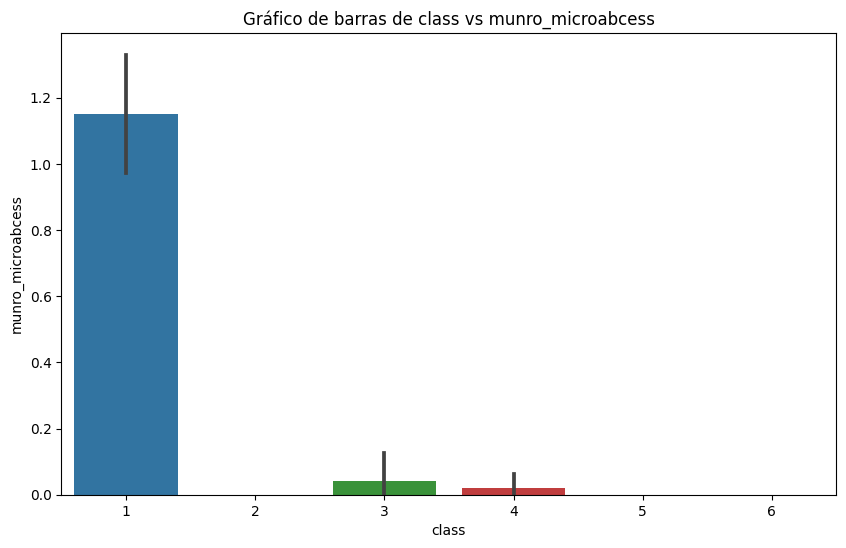

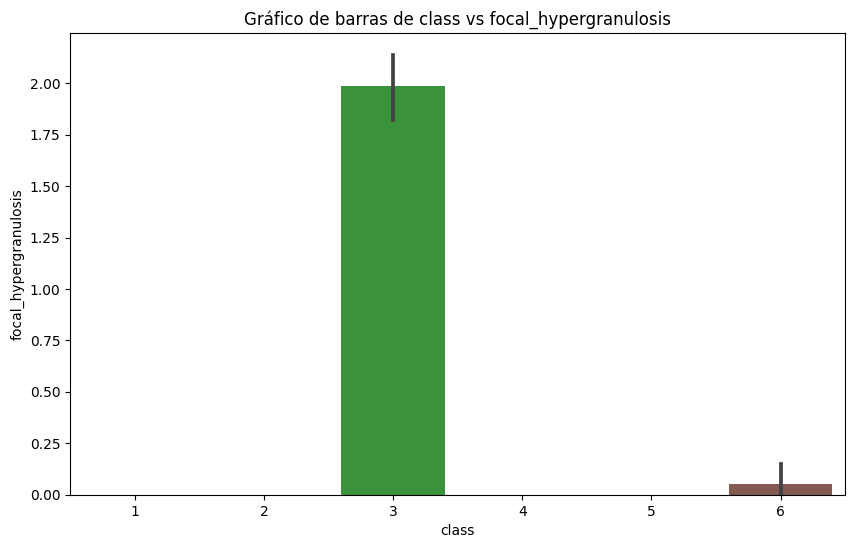

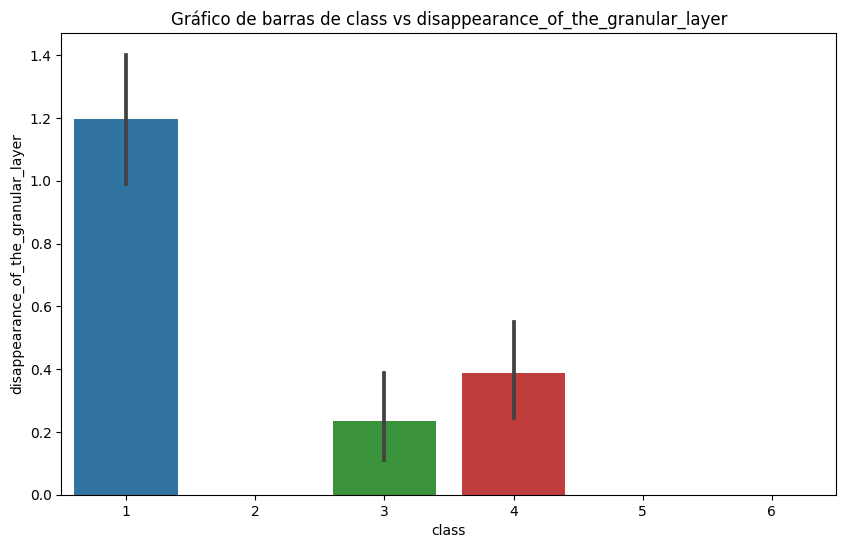

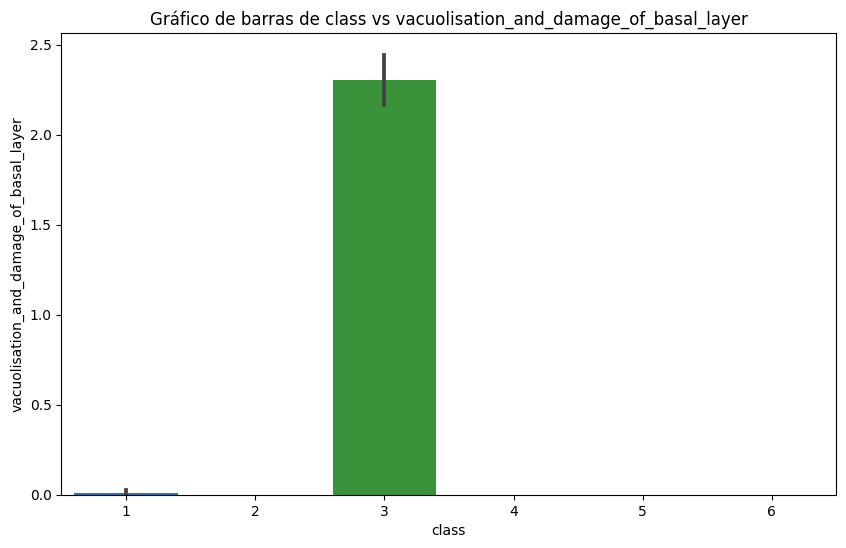

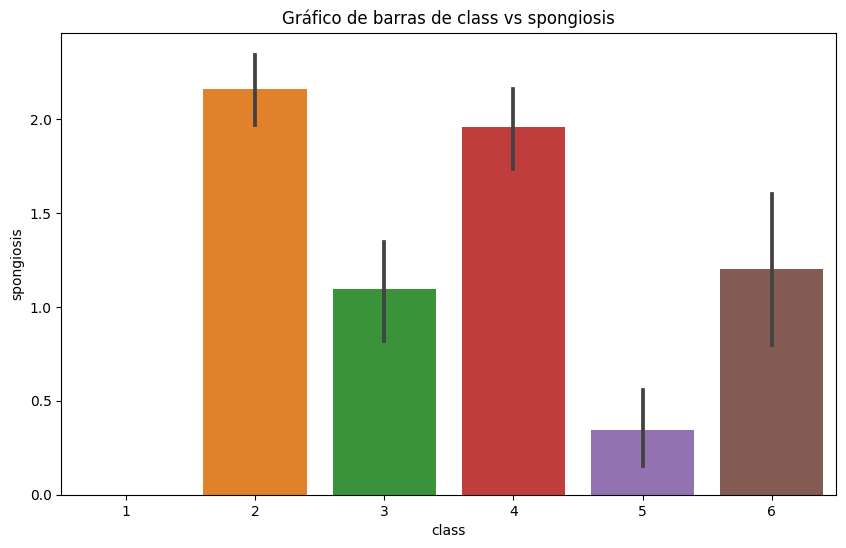

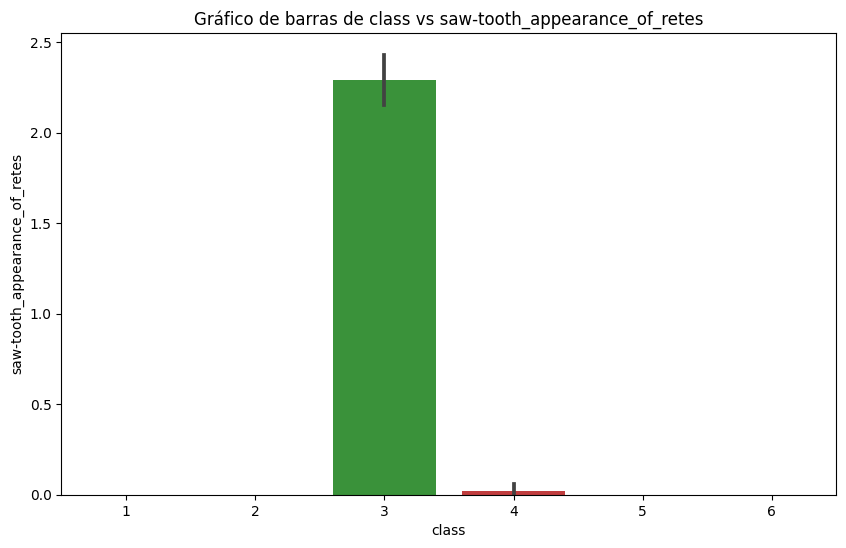

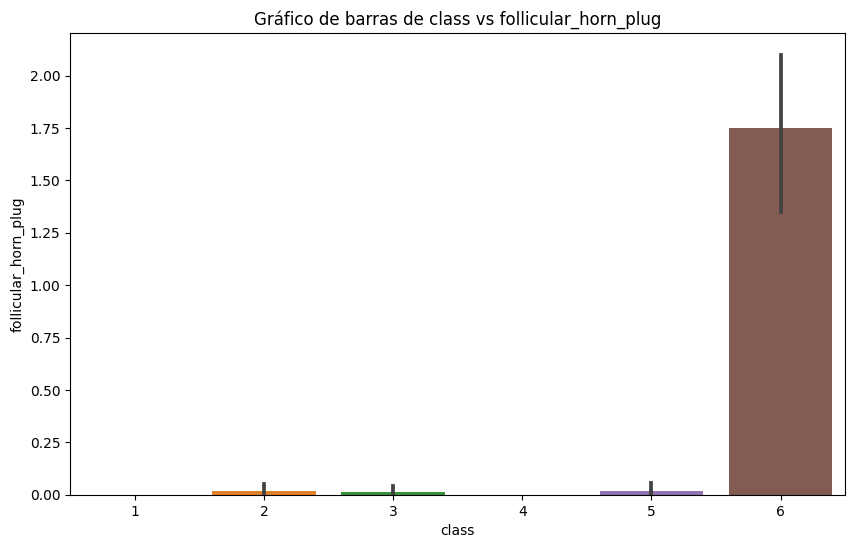

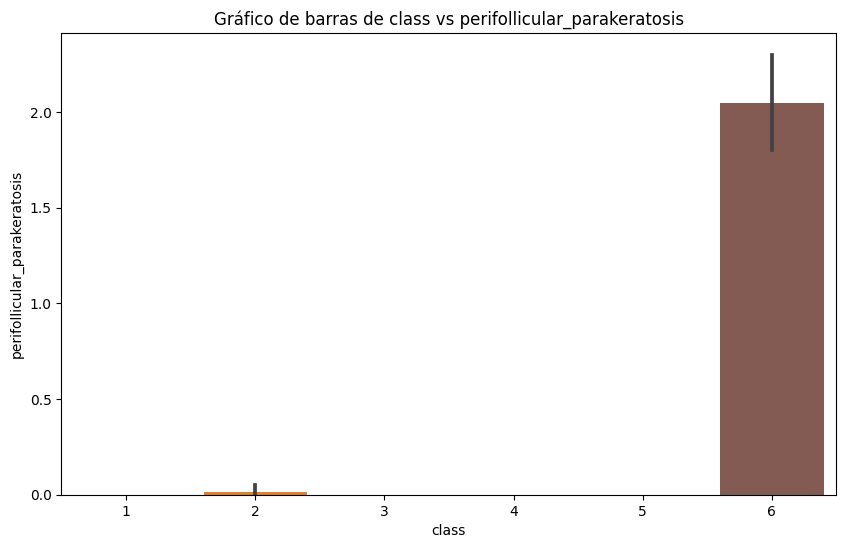

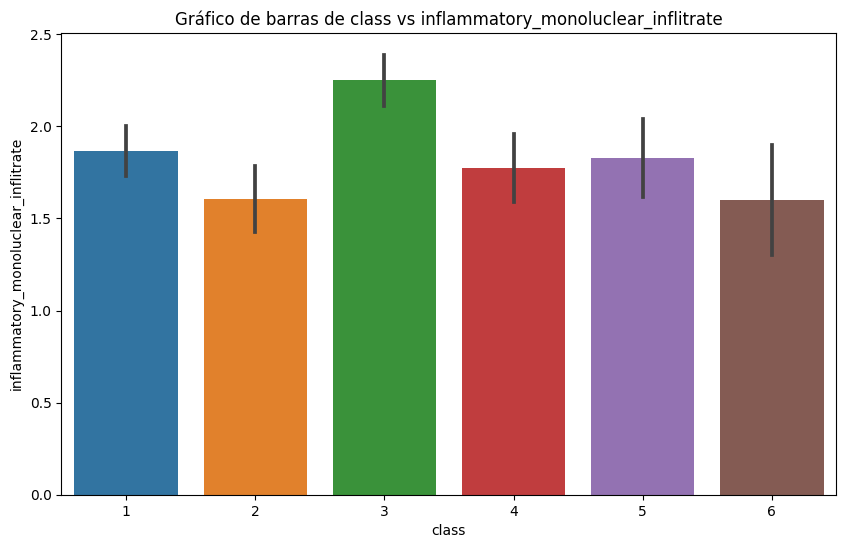

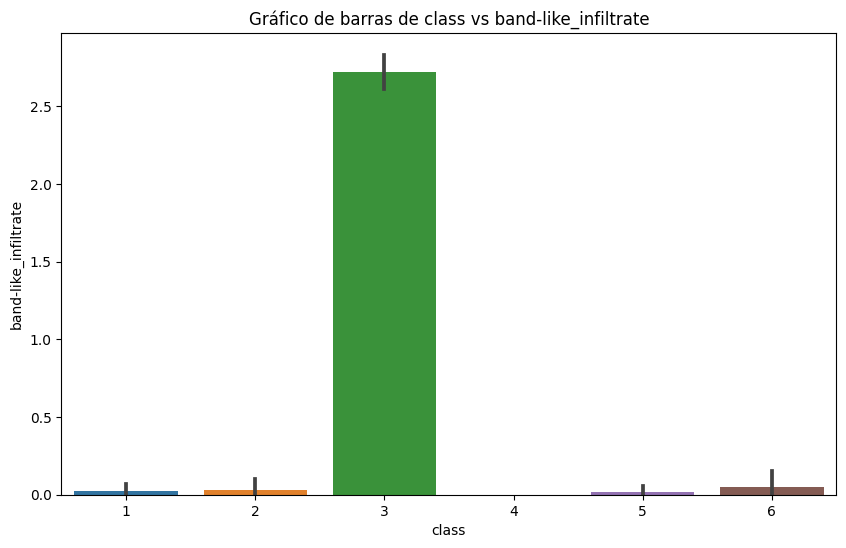

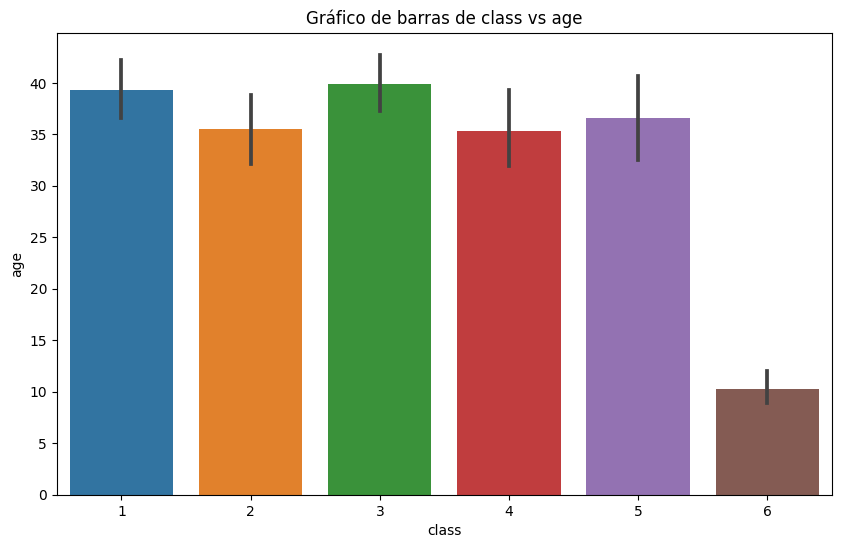

In [13]:
import seaborn as sns

for column_index, column in enumerate(dermatology.columns):
    if column == 'class':
        continue
    plt.figure(figsize=(10, 6))
    sns.barplot(x='class', y=column, data=dermatology)
    plt.title(f'Bar Chart of Class vs {column}')
    plt.show()

From the observation of the bar graphs we can suppose the following correlations:
- The '1' category of the disease will appear on individual with a high presence of marks on knees and elbows, high involvement of scalps, high pnl infiltrate, medium-high parakeratosis, high clubbing of the rete ridges, high elongation of the rete ridges, high thinning of the suprapapillary epidermis, low spongiform pustule, low munro microabcess and low disappearnce of the granular layer.
- The '2' category of the disease will appear on individual with a low presence of pnl infiltrate, medium-high exocytosis and medium-high spongiosis.
- The '3' category of the disease will appear on individuals with a high presence of polygonal papules, a high involvement of the oral mucosal, a high melanin incontinence, high focal hypergranulosis, high vacuolisation and damage of basal layer, high saw-tooth appearance of retes and high band-like infiltrate.
- The '4' category of the disease will appear on individuals with a low presence of the Koebner phenomenon, medium-high exocytosis and medium-high spongiosis.
- The '5' category of the disease will appear on individuals with a high presence of fibrosis of the papillary dermis and medium-high elongation of the rete ridges.
- The '6' category of the disease will appear on individuals with a high presence of follicular papules, a medium-high involvement of the knee and elbow, if a family member has previously had it, medium-high follicular horn plug and medium-high perifollicular parakeratosis. It also appears in younger ages. 
- The rest of the features can be associated to the disease in general from our supposition.

- Seaborn ViolinPlot

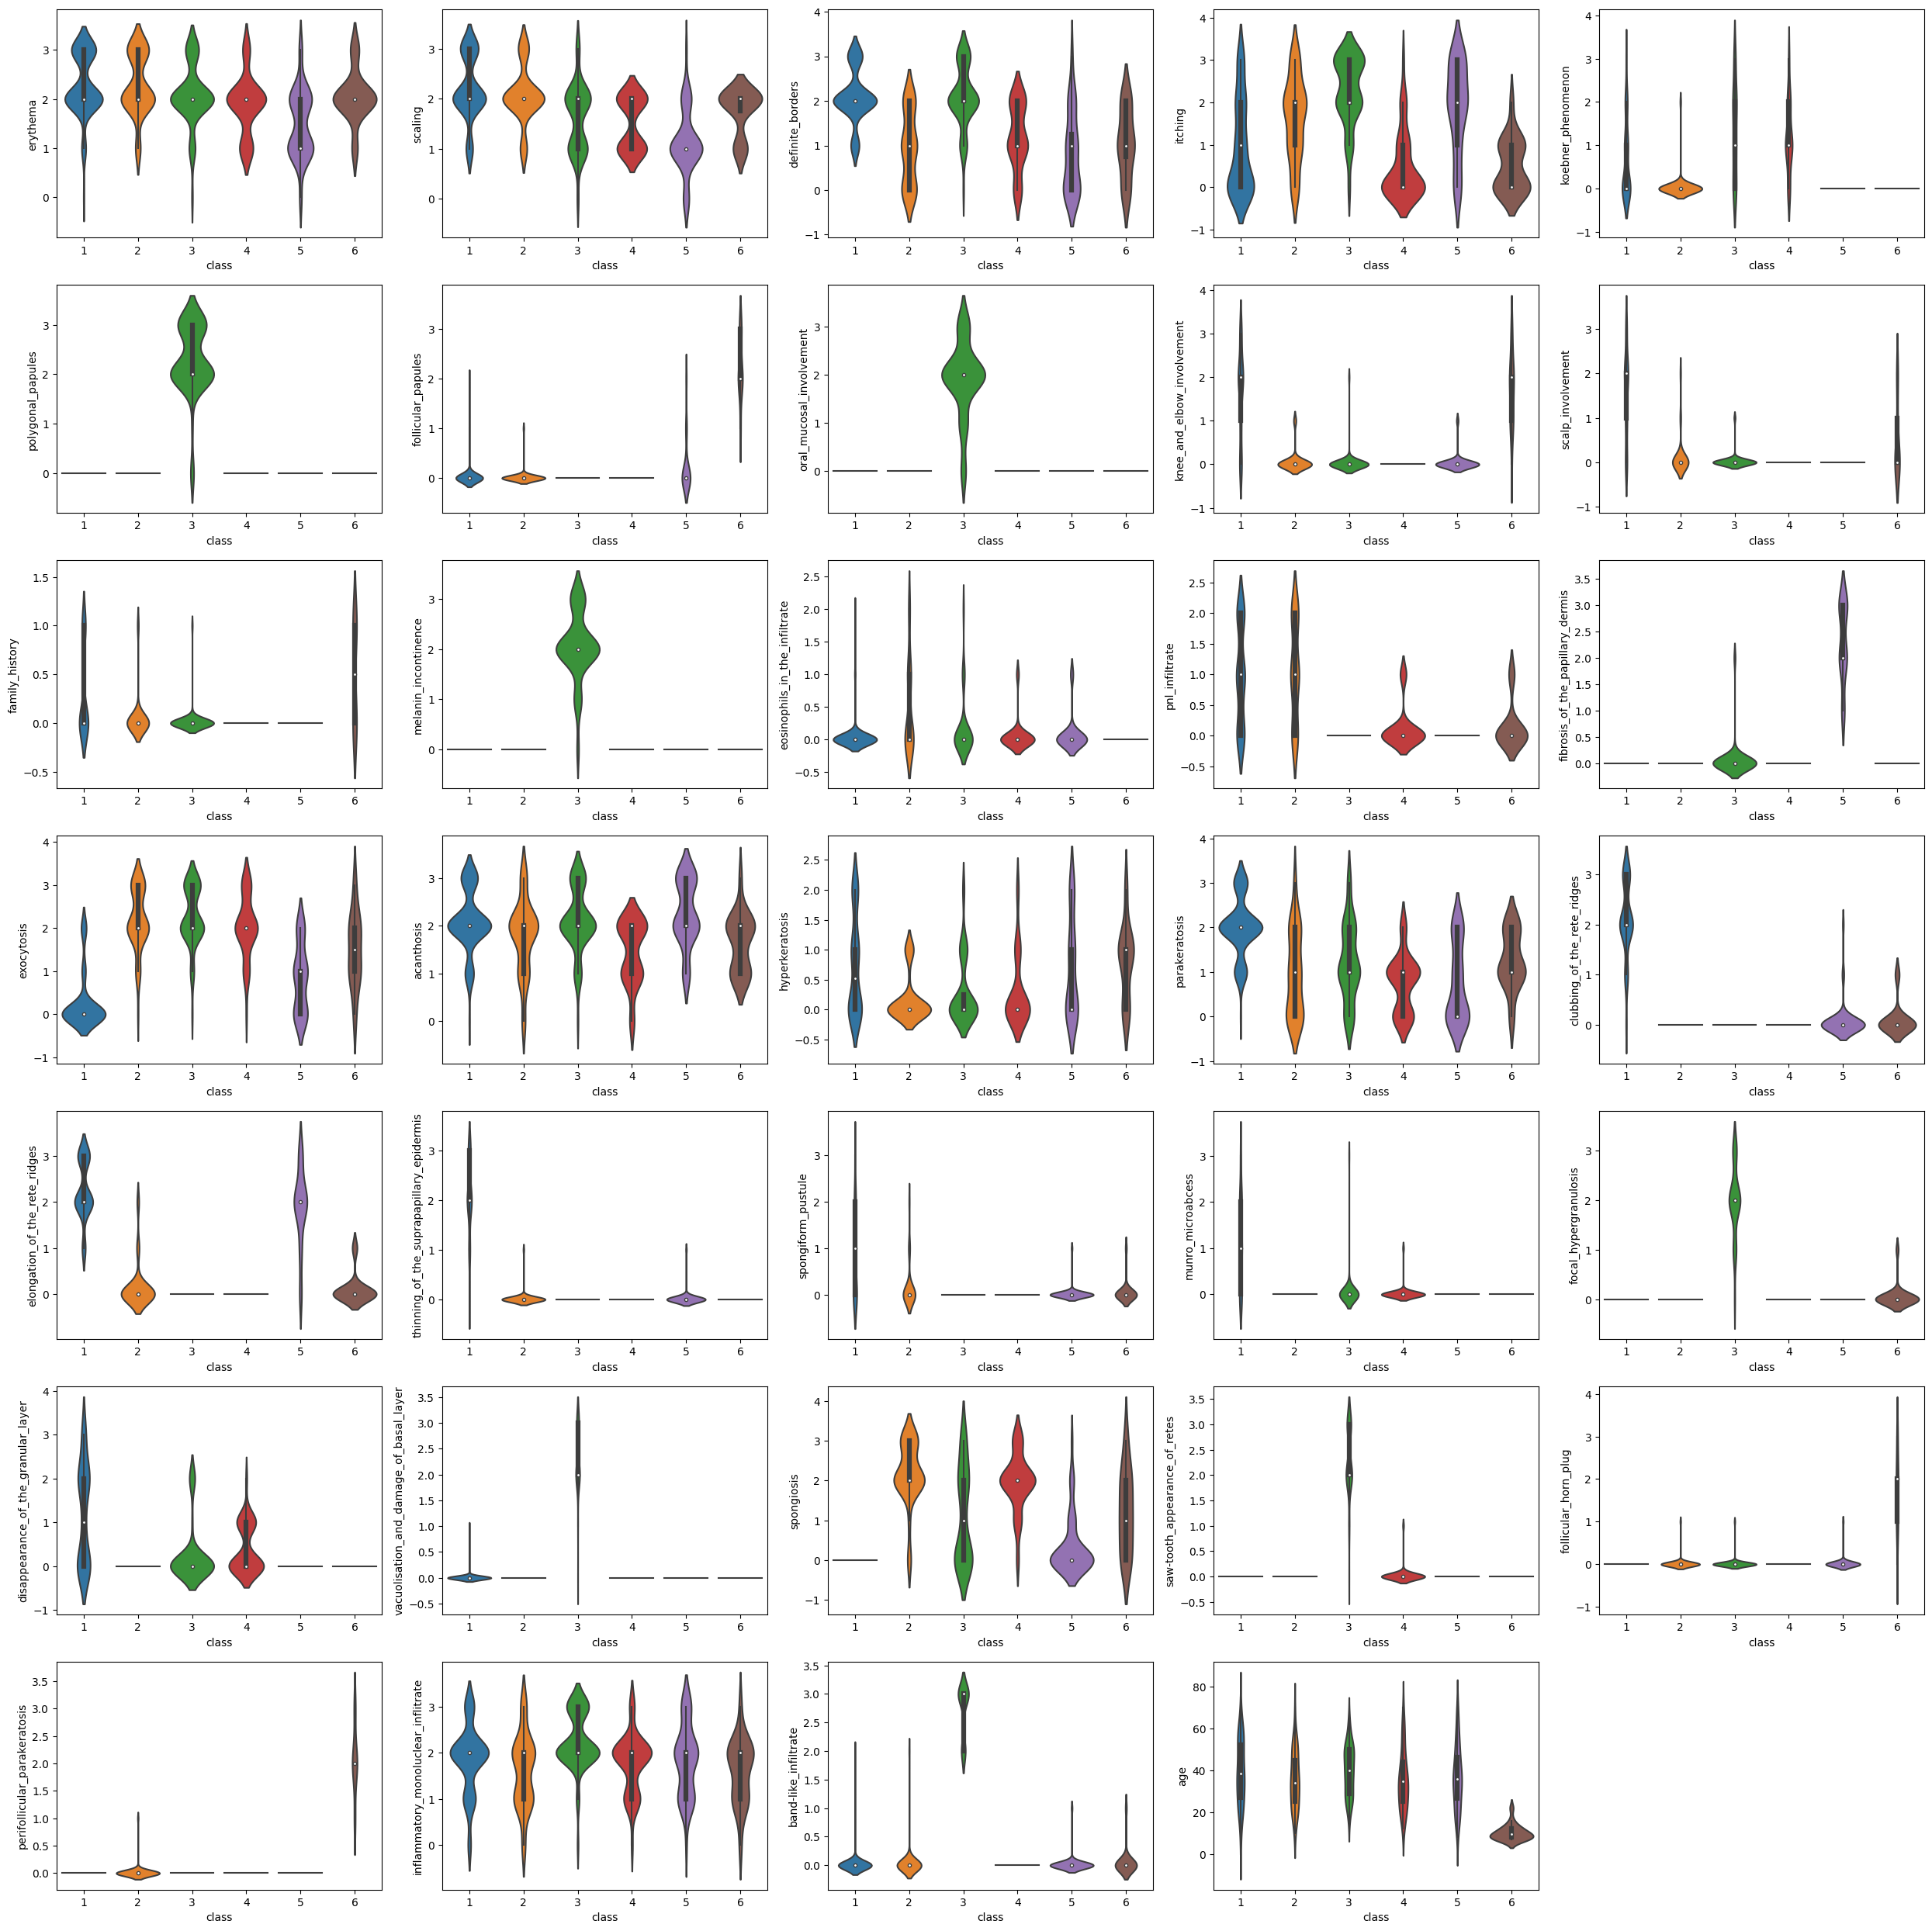

In [14]:
import seaborn as sns

# Determina el número de filas y columnas en función de la cantidad de columnas en tu DataFrame
num_rows = len(dermatology.columns) // 5 + len(dermatology.columns) % 5  # Asegura al menos 2 filas
num_cols = 5

plt.figure(figsize=(25, 25))
for column_index, column in enumerate(dermatology.columns):
    if column == 'class':
        continue
    plt.subplot(num_rows, num_cols, column_index + 1)
    sns.violinplot(x='class', y=column, data=dermatology)

# Ajusta la disposición de los subplots
plt.tight_layout()

# Muestra los subplots
plt.show()

Thanks to this violin plot we can verify the initial analysis with the bar graphs about the features associated to each of the categories of the disease. 

- Seaborn Pairplot

In [80]:
sns.pairplot(dermatology,hue="class")
plt.show()

We could not find any additional information using a Pairplot. 

- Correlation system

In [15]:
corr = dermatology.corr(method="pearson")
corr

erythema   scaling   
erythema                                  1.000000  0.435467  \
scaling                                   0.435467  1.000000   
definite_borders                          0.260087  0.357987   
itching                                  -0.047623 -0.084197   
koebner_phenomenon                        0.000694 -0.010576   
polygonal_papules                         0.033571 -0.075035   
follicular_papules                       -0.109550 -0.092400   
oral_mucosal_involvement                 -0.026810 -0.082969   
knee_and_elbow_involvement                0.141008  0.298398   
scalp_involvement                         0.186684  0.301577   
family_history                            0.172059  0.181491   
melanin_incontinence                      0.042126 -0.074856   
eosinophils_in_the_infiltrate             0.075228  0.042211   
pnl_infiltrate                            0.198872  0.279842   
fibrosis_of_the_papillary_dermis         -0.354595 -0.383585   
exocytosis                                0.021565 -0.110809   
acanthosis                                0.064165  0.108095   
hyperkeratosis                           -0.098828 -0.013731   
parakeratosis                             0.210030  0.296752   
clubbing_of_the_rete_ridges               0.157558  0.320740   
elongation_of_the_rete_ridges             0.007819  0.139073   
thinning_of_the_suprapapillary_epidermis  0.167868  0.330343   
spongiform_pustule                        0.169773  0.297783   
munro_microabcess                         0.113464  0.186366   
focal_hypergranulosis                    -0.013761 -0.085021   
disappearance_of_the_granular_layer       0.159100  0.211484   
vacuolisation_and_damage_of_basal_layer   0.002559 -0.109523   
spongiosis                                0.022468  0.012151   
saw-tooth_appearance_of_retes            -0.005779 -0.114467   
follicular_horn_plug                     -0.005450 -0.010518   
perifollicular_parakeratosis              0.009539 -0.011135   
inflammatory_monoluclear_inflitrate       0.075758 -0.010977   
band-like_infiltrate                     -0.006955 -0.132079   
age                                      -0.004974  0.015830   
class                                    -0.335537 -0.468688   

                                          definite_borders   itching   
erythema                                          0.260087 -0.047623  \
scaling                                           0.357987 -0.084197   
definite_borders                                  1.000000 -0.062564   
itching                                          -0.062564  1.000000   
koebner_phenomenon                                0.241342  0.267878   
polygonal_papules                                 0.327754  0.409696   
follicular_papules                               -0.166662 -0.144825   
oral_mucosal_involvement                          0.286684  0.359163   
knee_and_elbow_involvement                        0.302309 -0.299645   
scalp_involvement                                 0.268862 -0.155639   
family_history                                    0.115844 -0.136615   
melanin_incontinence                              0.311398  0.359207   
eosinophils_in_the_infiltrate                    -0.132021  0.095434   
pnl_infiltrate                                    0.003949 -0.099776   
fibrosis_of_the_papillary_dermis                 -0.274414  0.203032   
exocytosis                                       -0.205391  0.214822   
acanthosis                                        0.189761  0.067080   
hyperkeratosis                                    0.023478 -0.019125   
parakeratosis                                     0.361213 -0.075568   
clubbing_of_the_rete_ridges                       0.387205 -0.232224   
elongation_of_the_rete_ridges                     0.201702 -0.124058   
thinning_of_the_suprapapillary_epidermis          0.369266 -0.244052   
spongiform_pustule                                0.246204 -0.152689   
munro_mic

Because there are a great amount of columns in our dataset, we will need a graphical way to represent the correlation values between the features. 

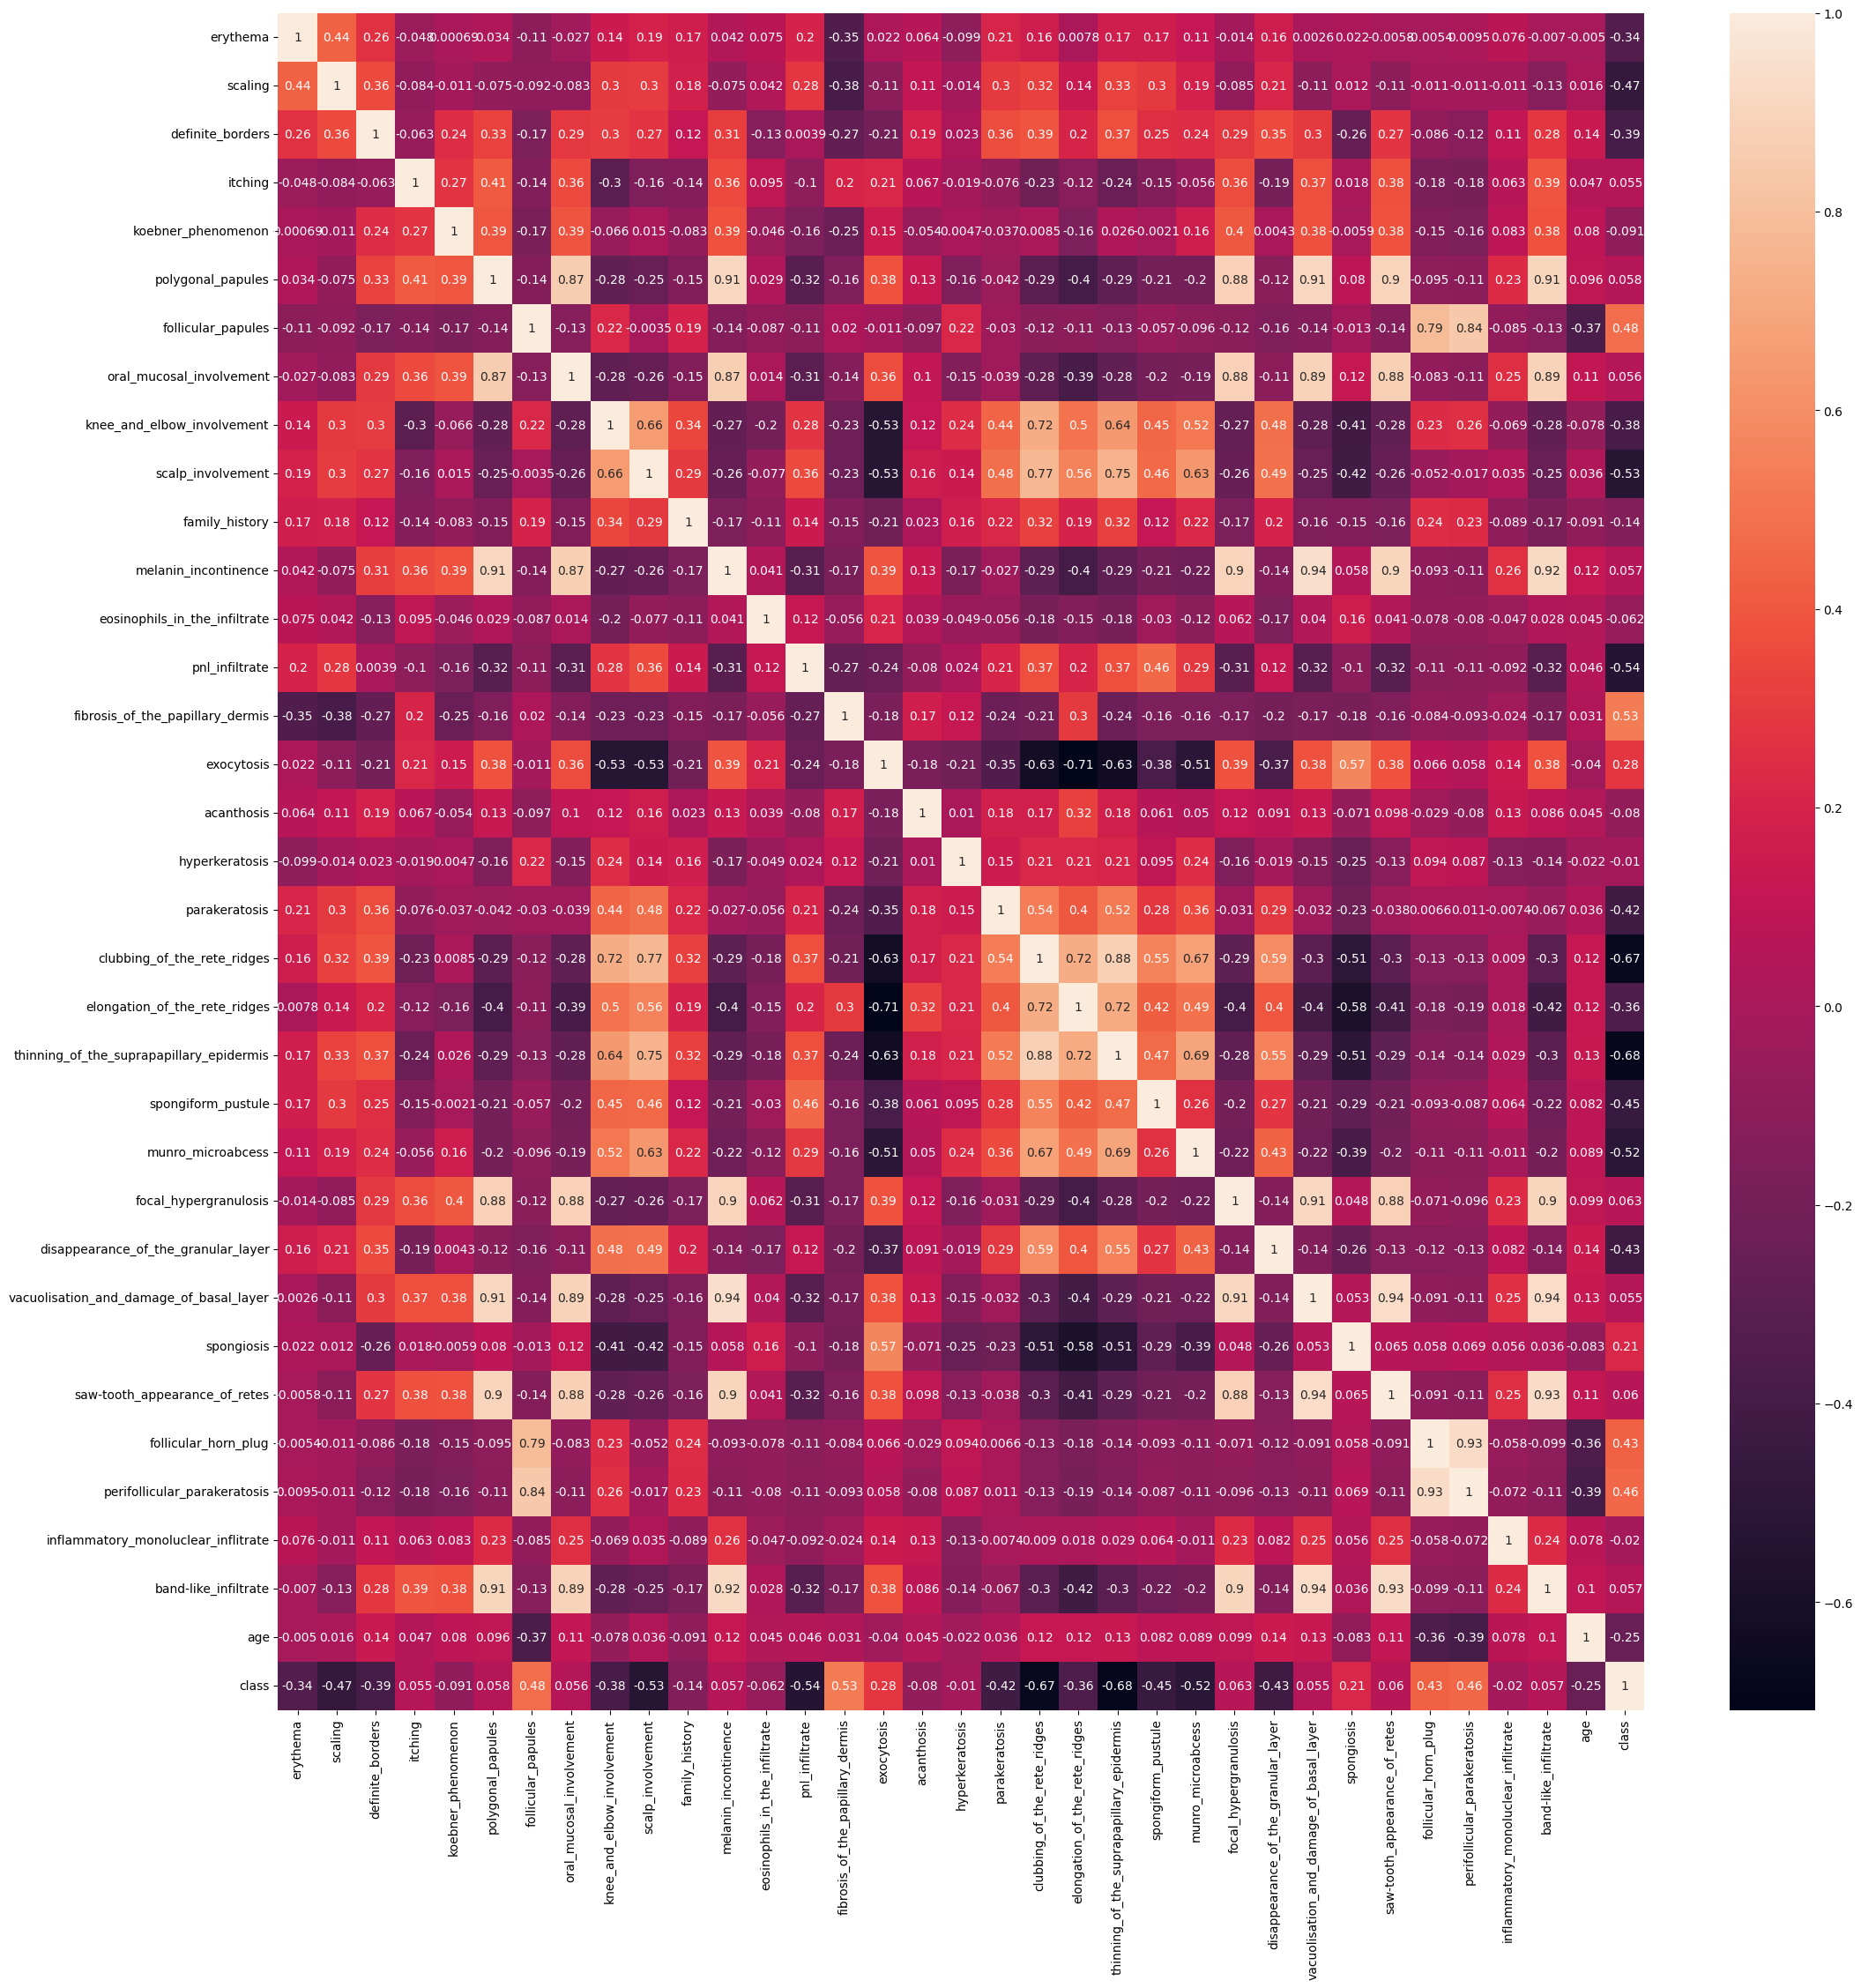

In [16]:
#Heat map
plt.figure(figsize=(25, 25))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True)
plt.show()

Despite the fact that we can find a correlation of 0.85 or higher in some clinical features with other clinical features (0.87 oral mucosal involvement <-> polygonal papules), clinical features with histopathological features (0.9 polygonal papules <-> saw tooth appearance of retes) and histopathological features with histopathological features (0.94 band-like infiltrate <-> vacuolisation and damage of basal layer) we will not remove any of the features due to our lack of expertise in the area and the need of a dermatologist consultation. 

# **DATA PREPROCESSING**

Data pre-processing. Training set preparation and validation for subsequent model generation.

In [17]:
from sklearn.preprocessing import StandardScaler #z = (x - mean) / std
dermatology_s = dermatology.copy()
std_scaler = StandardScaler()
#We escalate all the data unless the class column from the dataframe
for col in range(len(dermatology_s.columns)-1):
    dermatology_s.iloc[:,col] = std_scaler.fit_transform(dermatology_s.iloc[:, col].values.reshape(-1,1))

print(dermatology_s.head())
print(dermatology.head())

   erythema   scaling  definite_borders   itching  koebner_phenomenon   
0 -0.102895  0.292503         -1.709375  1.437334           -0.699049  \
1  1.403482  1.719916          1.600843  0.557628            0.403761   
2 -0.102895 -1.134911          0.497437  1.437334            0.403761   
3 -0.102895  0.292503          0.497437 -1.201784           -0.699049   
4 -0.102895  1.719916          0.497437  0.557628            1.506571   

   polygonal_papules  follicular_papules  oral_mucosal_involvement   
0          -0.468702           -0.292496                 -0.452637  \
1          -0.468702           -0.292496                 -0.452637   
2           2.669312           -0.292496                  3.148777   
3          -0.468702           -0.292496                 -0.452637   
4           1.623308           -0.292496                  1.948306   

   knee_and_elbow_involvement  scalp_involvement  ...   
0                    0.392453          -0.574000  ...  \
1                    0.392

* Split train and test:

Training with train set and evaluation with test set (data not seen by the model). Actual measurement of model accuracy

In [18]:
from sklearn.model_selection import train_test_split #ML library

X = dermatology.drop(labels='class', axis=1)
Y = dermatology['class']-1 # 1-6 --> 0-5 When classifying, the classes must start from 0

# Split the data into train and test sets with a 80-20% ratio
# We have chosen this ratio because with will train the dataset with 5 folds in the cross validation
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=1)
#stratify = dermatology_s['class']
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(292, 34) (292,)
(74, 34) (74,)


In [19]:
from sklearn.model_selection import train_test_split #ML library

X_s = dermatology_s.drop(labels='class', axis=1)
Y_s = dermatology_s['class']

x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(X_s, Y_s, test_size=0.2,random_state=1)
#stratify = dermatology_s['class']
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(292, 34) (292,)
(74, 34) (74,)


We explore the information in the train and test set.

In [20]:
print(y_train.value_counts(),'\n',y_test.value_counts())

class
0    87
2    57
1    49
4    43
3    37
5    19
Name: count, dtype: int64 
 class
0    25
2    15
1    12
3    12
4     9
5     1
Name: count, dtype: int64


# **MODELLING & EVALUATION**

Generation and evaluation of Machine Learning models that best fit the objective and achieve the KPIs of the project:

Training: Classification Methods
Evaluation: Accuracy, precision, recall and f1 score

## **CLASIFICATION**

---

TPOT

---

To train the data we are going to use the TPOT library to compare several classification algorithms and with this tool we will be able to analyce which is the best algorithm for our problem. We instance it locally because of installation problems with anaconda kernel's.

TPOT project: https://github.com/epistasislab/tpot

In [22]:
from tpot.tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

tpot = TPOTClassifier(population_size=len(x_train) ,cv=5, verbosity=2, n_jobs=-1)
tpot.fit(x_train, y_train)
print(tpot.score(x_test, y_test))

Optimization Progress:   0%|          | 0/29492 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9897720631209819

Generation 2 - Current best internal CV score: 0.9931618936294566

Generation 3 - Current best internal CV score: 0.9931618936294566

Generation 4 - Current best internal CV score: 0.9931618936294566

Generation 5 - Current best internal CV score: 0.9932203389830508

Generation 6 - Current best internal CV score: 0.9932203389830508

Generation 7 - Current best internal CV score: 0.9966101694915255

Generation 8 - Current best internal CV score: 0.9966101694915255

Generation 9 - Current best internal CV score: 0.9966101694915255

Generation 10 - Current best internal CV score: 0.9966101694915255

Generation 11 - Current best internal CV score: 0.9966101694915255

Generation 12 - Current best internal CV score: 0.9966101694915255

Generation 13 - Current best internal CV score: 0.9966101694915255

Generation 14 - Current best internal CV score: 0.9966101694915255

Generation 15 - Current best internal CV score: 0.996610

We create an object of type TPOTClassifier, assigning it as population number, the population of the sample that we are going to use to train the algorithms, then we will use a cross validation (cv) of 5, we will apply a verbosity of 2 to report the percentage on the screen, and finally, we will specify with the parameter n_jobs the CPU's that we are going to use to execute the process. In this case, we indicate -1 to say that we will be using all the available ones.

As default, TPOT will search over a broad range of preprocessors, feature constructors, feature selectors, models, and parameters to find a series of operators that minimize the error of the model predictions. Some of these operators are complex and may take a long time to run, especially on larger datasets. There are more configurations, but we have chosen the default one. (http://epistasislab.github.io/tpot/using/#built-in-tpot-configurations)

In [26]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

predict = tpot.predict(x_test)
print(classification_report(y_test, predict))

# Print the accuracy, precision, recall and f1 score
print("Accuracy score", accuracy_score(y_test, predict))
print("Precision score", precision_score(y_test, predict, average='weighted'))
print("Recall score", recall_score(y_test, predict, average='weighted'))
print("F1 score", f1_score(y_test, predict, average='weighted'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.91      0.83      0.87        12
           2       1.00      1.00      1.00        15
           3       0.85      0.92      0.88        12
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         1

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74

Accuracy score 0.9594594594594594
Precision score 0.9603099603099604
Recall score 0.9594594594594594
F1 score 0.959388954171563


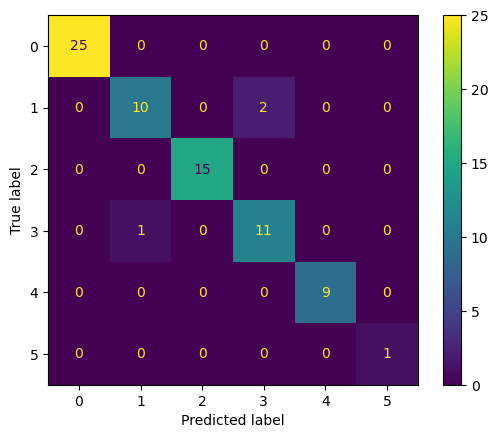

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix = conf, display_labels = tpot.classes_)
disp.plot()
plt.show()

---

AUTO-SKLEARN

---

As well as using the TPOT library to automate the building of our data model, we will compare it to the Auto Sklearn library. It uses different classifiers such as RandomForestClassifier, PassiveAggressive, GradientBoosting,etc.  
The documentation for the library is the following: https://automl.github.io/auto-sklearn/master/index.html

## Build and fit a classifier

In [21]:
import autosklearn.classification
cls = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=3600*5, # default time is 1 hour (3600 seconds). Because of a 5-cross validation we will train it for 5 hours
    resampling_strategy="cv", # We will use a cross validation in order to comply with our KPIs
    resampling_strategy_arguments={'folds': 5}) # We will do 5 folds due to the 80-20% train-test ratio
cls.fit(x_train, y_train)
predictions = cls.predict(x_test)

Fitting to the training data: 100%|█████████████████████████████████████████████████████████████████████████████████| 18000/18000 [5:01:03<00:00,  1.00s/it, The total time budget for this task is 5:00:00]


## View the models trained by auto-sklearn

In [22]:
print(cls.leaderboard())

          rank  ensemble_weight                type      cost    duration
model_id                                                                 
124          1             0.06  passive_aggressive  0.010274   20.972901
151          2             0.04       random_forest  0.013699   47.516837
128          4             0.02       random_forest  0.013699   46.893858
154          3             0.02       random_forest  0.013699   46.393515
130          5             0.04       random_forest  0.013699   48.691273
146          6             0.04       random_forest  0.017123   56.063304
87           7             0.06       random_forest  0.017123   48.805575
91           8             0.06       random_forest  0.017123   55.259524
94           9             0.02       random_forest  0.017123   60.084164
75          10             0.02  passive_aggressive  0.020548   21.532360
25          12             0.04       random_forest  0.020548   53.498519
136         11             0.04       

The best performing algorithms are the Passive Aggressive Classifier and the Random Forest Classifier. Nevertheless, the Passive Aggressive algorithm has a better result of both and will be the one used in solving our problem for the following reasons: 
1. **Online Learning**: The PA algorithm is suited for online learning, where the model learns from individual data points one at a time and updates its parameters accordingly.
2. **Loss Minimization**: The algorithm aims to minimise a loss function that quantifies the error between the predicted labels and the true labels. When the model makes a mistake, it responds by adjusting its parameters to reduce the error.
3. **Passive Updates**: In cases where the model's current prediction is correct, it makes only minor or passive parameter updates to maintain or improve accuracy.
4. **Aggressive Updates**: When the model's prediction is incorrect, it reacts aggressively by making more substantial updates to the model's parameters to correct the error. The level of aggression is controlled by a hyperparameter known as the aggressiveness parameter.
5. **Margin-Based Classification**: The algorithm often employs a margin-based approach, where it tries to ensure a safe margin between the decision boundary and the data points. A larger margin provides better robustness to noisy data.
6. **Regularization**: Regularization is used to control the complexity of the model and prevent overfitting. The level of regularization is controlled by a hyperparameter.
7. **Adaptive Learning Rate**: The learning rate, or the rate at which the model adapts to new data, can be adjusted based on the quality of predictions and is typically calculated based on the loss.
8. **Binary Classification**: While the original PA algorithm is designed for binary classification, it can be extended to handle multi-class problems using techniques like one-vs-all (OvA) or one-vs-one (OvO) strategies.
9. **Shortest Training Time**: Compared to some of the peer algorithms in scoring (RandomForest or MultiLayer Perceptron) it is optimised to use the least time in its training, a great advantage in the clinical context. 

## Print the ensemble constructed by auto-sklearn

In [23]:
from pprint import pprint
pprint(cls.show_models())

{2: {'cost': 0.02054794520547945,
     'ensemble_weight': 0.04,
     'estimators': [{'balancing': Balancing(random_state=1),
                     'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x4081e2d730>,
                     'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x4082e11a60>,
                     'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x4081e2d370>,
                     'sklearn_classifier': RandomForestClassifier(max_features=5, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)},
                    {'balancing': Balancing(random_state=1),
                     'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x4096623730>,
                     'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPrepr

 25: {'cost': 0.020547945205479437,
      'ensemble_weight': 0.04,
      'estimators': [{'balancing': Balancing(random_state=1),
                      'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x40b668a730>,
                      'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x408ef47c10>,
                      'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x40b668a2b0>,
                      'sklearn_classifier': RandomForestClassifier(max_features=1, min_samples_split=3, n_estimators=512,
                       n_jobs=1, random_state=1, warm_start=True)},
                     {'balancing': Balancing(random_state=1),
                      'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x40b0888fd0>,
                      'data_preprocessor': <autosklearn.pipeline.compone

                     {'balancing': Balancing(random_state=1),
                      'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x40b97863d0>,
                      'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x40b971bc10>,
                      'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x40b9786250>,
                      'sklearn_classifier': RandomForestClassifier(bootstrap=False, max_features=3, n_estimators=512,
                       n_jobs=1, random_state=1, warm_start=True)}],
      'model_id': 55,
      'rank': 47,
      'voting_model': VotingClassifier(estimators=None, voting='soft')},
 65: {'cost': 0.030821917808219183,
      'ensemble_weight': 0.02,
      'estimators': [{'balancing': Balancing(random_state=1),
                      'classifier': <autosklearn.pipeline.components.classification.Clas

      'voting_model': VotingClassifier(estimators=None, voting='soft')},
 80: {'cost': 0.027397260273972615,
      'ensemble_weight': 0.04,
      'estimators': [{'balancing': Balancing(random_state=1),
                      'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x40b4afba00>,
                      'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x40b0876cd0>,
                      'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x40b4ac0400>,
                      'sklearn_classifier': PassiveAggressiveClassifier(C=3.470627963725608, average=True,
                            loss='squared_hinge', max_iter=64, random_state=1,
                            tol=0.00030006588470997685, warm_start=True)},
                     {'balancing': Balancing(random_state=1),
                      'classifier': <autosklearn.pipel

                      'sklearn_classifier': RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=4,
                       n_estimators=512, n_jobs=1, random_state=1,
                       warm_start=True)},
                     {'balancing': Balancing(random_state=1),
                      'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x40bbcb24c0>,
                      'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x40bbc3cd30>,
                      'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x40bbcb2370>,
                      'sklearn_classifier': RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=4,
                       n_estimators=512, n_jobs=1, random_state=1,
                       warm_start=True)}],
      'model_id': 87,
      'rank': 9,
      'voting_mod

      'estimators': [{'balancing': Balancing(random_state=1, strategy='weighting'),
                      'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x40b90769a0>,
                      'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x40b6260f10>,
                      'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x40b9076250>,
                      'sklearn_classifier': RandomForestClassifier(bootstrap=False, max_features=5, n_estimators=512,
                       n_jobs=1, random_state=1, warm_start=True)},
                     {'balancing': Balancing(random_state=1, strategy='weighting'),
                      'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x40bb514b20>,
                      'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.Data

       'estimators': [{'balancing': Balancing(random_state=1),
                       'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x40bb31ce80>,
                       'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x40b96b7640>,
                       'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x40bb31c730>,
                       'sklearn_classifier': PassiveAggressiveClassifier(C=0.0018619610028458504, loss='squared_hinge',
                            max_iter=16, random_state=1,
                            tol=0.019192402366043294, warm_start=True)},
                      {'balancing': Balancing(random_state=1),
                       'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x40bbf07a60>,
                       'data_preprocessor': <autosklearn.pipeline.compone

                      {'balancing': Balancing(random_state=1),
                       'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x40bf90ad30>,
                       'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x40bf8ad670>,
                       'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x40bf90abe0>,
                       'sklearn_classifier': RandomForestClassifier(bootstrap=False, max_features=3, min_samples_leaf=2,
                       n_estimators=512, n_jobs=1, random_state=1,
                       warm_start=True)},
                      {'balancing': Balancing(random_state=1),
                       'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x40bfc62700>,
                       'data_preprocessor': <autosklearn.pipeline.components.data_preprocessi

                       'sklearn_classifier': PassiveAggressiveClassifier(C=0.0005545022246655298, average=True,
                            loss='squared_hinge', max_iter=32, random_state=1,
                            tol=0.009215790744328664, warm_start=True)},
                      {'balancing': Balancing(random_state=1),
                       'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x40be584f70>,
                       'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x40be4e6130>,
                       'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x40be584ca0>,
                       'sklearn_classifier': PassiveAggressiveClassifier(C=0.0005545022246655298, average=True,
                            loss='squared_hinge', max_iter=32, random_state=1,
                            tol=0.009215790744328664, warm

       'estimators': [{'balancing': Balancing(random_state=1),
                       'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x40be6aeee0>,
                       'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x40bcf87940>,
                       'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x40be6a2dc0>,
                       'sklearn_classifier': RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=1,
                       min_samples_leaf=2, min_samples_split=17,
                       n_estimators=512, n_jobs=1, random_state=1,
                       warm_start=True)},
                      {'balancing': Balancing(random_state=1),
                       'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x40c06d92b0>,
                       'dat

## Show Metrics

In [24]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Print a report per class
print(classification_report(y_test, predictions))

# Print the accuracy, precision, recall and f1 score
print("Accuracy score", accuracy_score(y_test, predictions))
print("Precision score", precision_score(y_test, predictions, average='weighted'))
print("Recall score", recall_score(y_test, predictions, average='weighted'))
print("F1 score", f1_score(y_test, predictions, average='weighted'))

# We have to use a weighted average because the dataset is unbalanced

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.91      0.83      0.87        12
           2       1.00      1.00      1.00        15
           3       0.85      0.92      0.88        12
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         1

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74

Accuracy score 0.9594594594594594
Precision score 0.9603099603099604
Recall score 0.9594594594594594
F1 score 0.959388954171563


## Display Confusion Matrix

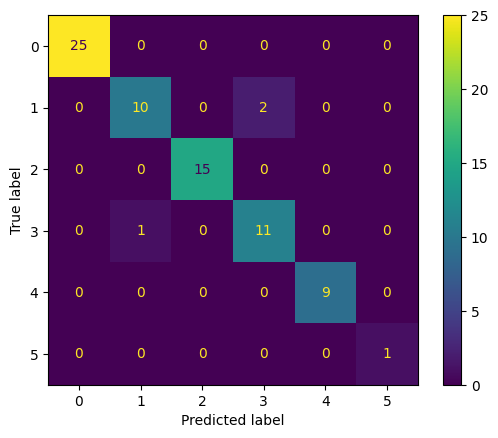

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=cls.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cls.classes_)
disp.plot()
plt.show()

# Final analysis

In comparing the results obtained from the TPOT library, which recommends the `GradientBoostingClassifier`, and the AutoSklearn library, which recommends the `PassiveAggressiveClassifier` for our dataset, it's important to consider several factors before making a final decision on which classifier to use. The choice of classifier depends on the specific characteristics of out dataset, the problem we're trying to solve, and out objectives. Here's a conclusion that outlines the considerations and provides guidance on the choice.

**Conclusion:**

After an in-depth analysis of the results obtained from the TPOT and AutoSklearn libraries, both of which recommend different classifiers for your dataset, the decision on which classifier to use should be based on a combination of factors, including the nature of out data, the problem we're addressing, and out objectives.

**1. Nature of the Data:**

   - **If the Data is Structured**: If our dataset consisted of structured data with clear patterns and relationships between features, the `GradientBoostingClassifier` recommended by TPOT would be a suitable choice. Gradient boosting methods are known for their strong predictive performance and are effective in capturing complex patterns in structured data.

   - **If the Data is Noisy or Evolving**: On the other hand, because our dataset is noisy, may evolve over time, and has non-stationary characteristics, the `PassiveAggressiveClassifier` suggested by AutoSklearn is be a better fit. Passive Aggressive classifiers are designed for online learning and can adapt to changes in the data distribution. They are particularly useful in scenarios where the data may exhibit concept drift or where quick model updates are required.

**2. Problem Characteristics:**

   - **Binary vs. Multiclass Classification**: Both classifiers can be adapted for either task, but their effectiveness vary based on the specific problem. Gradient boosting classifiers often excel in binary classification tasks, while Passive Aggressive classifiers are versatile for both binary and multiclass problems.

   - **Class Imbalance**: Because we have an imbalance between classes, we want to take into account the ability of each classifier to handle such scenarios. Gradient boosting models can be sensitive to class imbalance, whereas Passive Aggressive classifiers can adapt to class distribution changes.

**3. Objectives:**

   - **Prediction Accuracy**: We also have to consider the relative performance of both classifiers in terms of prediction accuracy. We have assessed their performance through cross-validation, fine-tuning of hyperparameters, and other model evaluation techniques. Ultimately, the classifier which provides higher accuracy on our dataset is a strong candidate. Because both have obtained the same metric, we will not take this aspect into account.

   - **Efficiency and Real-Time Requirements**: If we were to have specific constraints on model training and prediction time, we would have to evaluate the efficiency of each classifier. Passive Aggressive classifiers are known for their efficiency in online learning and real-time applications.

The decision of choosing has been guided by the characteristics of our data mentioned above, the problem at hand, and our specific objectives. After experimenting with both classifiers, fine-tuning hyperparameters, and performing rigorous model evaluation we have determined which one yields the best results for your particular use case. The classifier which would best solve the classification of the 6 classes of Eryhemato-Squamous Disease would be the `PassiveAggressiveClassiffier`.

Another alternative would be using ensemble methods or hybrid approaches that combine the strengths of both classifiers. These could explore an alternative solution, potentially achieving higher prediction accuracy while maintaining adaptability to evolving data. 